In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# importamos las librerias que vamos a usar en el proyecto

In [2]:
# guardamos en 3 variables las estadisticas de las diferentes ligas que vamos a analizar. Utilizamos 
# read_html para poder leer los datos de la página FBREF.com
df_1 = pd.read_html("https://fbref.com/es/comps/12/2020-2021/Estadisticas-2020-2021-La-Liga")
df_2 = pd.read_html("https://fbref.com/es/comps/12/2021-2022/Estadisticas-2021-2022-La-Liga")
df_3 = pd.read_html("https://fbref.com/es/comps/12/2022-2023/Estadisticas-2022-2023-La-Liga")

In [3]:
# guardamos en variables las primeras tablas, que corresponden con los ligas de los años 2021-2122-2223.
df_1_0 = df_1[0]
df_2_0 = df_2[0]
df_3_0 = df_3[0]

In [4]:
# observamos las columnas de la tabla  
df_1_0.columns

Index(['RL', 'Equipo', 'PJ', 'PG', 'PE', 'PP', 'GF', 'GC', 'DG', 'Pts',
       'Pts/PJ', 'xG', 'xGA', 'xGD', 'xGD/90', 'Asistencia',
       'Máximo Goleador del Equipo', 'Portero', 'Notas'],
      dtype='object')

In [5]:
#hacemos una primera selección de columnas que no vamos a utilizar
eliminar_columna = ['xGD/90', 'Asistencia', 'Máximo Goleador del Equipo', 'Portero', 'Notas']

In [6]:
# eliminamos esas columnas en las tres variables
df_1_0 = df_1_0.drop(eliminar_columna, axis=1)
df_2_0 = df_2_0.drop(eliminar_columna, axis=1)
df_3_0 = df_3_0.drop(eliminar_columna, axis=1)

In [7]:
df_3_0.head()

,RL,Equipo,PJ,PG,PE,PP,GF,GC,DG,Pts,Pts/PJ,xG,xGA,xGD
0,1,Barcelona,38,28,4,6,70,20,50,88,2.32,75.5,33.2,42.3
1,2,Real Madrid,38,24,6,8,75,36,39,78,2.05,75.5,38.9,36.6
2,3,Atlético Madrid,38,23,8,7,70,33,37,77,2.03,61.9,41.1,20.8
3,4,Real Sociedad,38,21,8,9,51,35,16,71,1.87,52.9,33.0,19.8
4,5,Villarreal,38,19,7,12,59,40,19,64,1.68,61.6,49.9,11.8


In [8]:
# ordenamos las tablas por equipo, de manera que queda ordenado alfabeticamente.
df_1_01 = df_1_0.sort_values(by="Equipo")
df_2_01 = df_2_0.sort_values(by="Equipo")
df_3_01 = df_3_0.sort_values(by="Equipo")

In [9]:
df_1_01.head()

,RL,Equipo,PJ,PG,PE,PP,GF,GC,DG,Pts,Pts/PJ,xG,xGA,xGD
15,16,Alavés,38,9,11,18,36,57,-21,38,1.00,42.6,49.9,-7.3
9,10,Athletic Club,38,11,13,14,46,42,4,46,1.21,43.1,37.7,5.4
0,1,Atlético Madrid,38,26,8,4,67,25,42,86,2.26,52.8,37.1,15.7
2,3,Barcelona,38,24,7,7,85,38,47,79,2.08,73.5,40.8,32.7
5,6,Betis,38,17,10,11,50,50,0,61,1.61,49.1,46.8,2.2


In [10]:
# y le aplicamos un reset al indice para que nos coincida en la concatenación que haremos mas adelante 
df_1_01.reset_index(drop=True, inplace=True)
df_2_01.reset_index(drop=True, inplace=True)
df_3_01.reset_index(drop=True, inplace=True)

In [227]:
df_3_01

,RL,Equipo,PJ,PG,PE,PP,GF,GC,DG,Pts,Pts/PJ,xG,xGA,xGD
0,17,Almería,38,11,8,19,49,65,-16,41,1.08,45.5,62.5,-17.0
1,8,Athletic Club,38,14,9,15,47,43,4,51,1.34,54.2,36.9,17.3
2,3,Atlético Madrid,38,23,8,7,70,33,37,77,2.03,61.9,41.1,20.8
3,1,Barcelona,38,28,4,6,70,20,50,88,2.32,75.5,33.2,42.3
4,6,Betis,38,17,9,12,46,41,5,60,1.58,51.3,50.0,1.3
5,13,Celta Vigo,38,11,10,17,43,53,-10,43,1.13,42.6,45.4,-2.8
6,14,Cádiz,38,10,12,16,30,53,-23,42,1.11,41.5,61.6,-20.1
7,20,Elche,38,5,10,23,30,67,-37,25,0.66,37.5,70.0,-32.6
8,19,Espanyol,38,8,13,17,52,69,-17,37,0.97,48.3,59.8,-11.5
9,15,Getafe,38,10,12,16,34,45,-11,42,1.11,36.7,46.0,-9.4


In [11]:
# nos descargamos la segunda tabla, donde nos muestra las actuaciones del equipo tanto de local como de visitante.
# en principio esta tabla no la voy a utilizar por falta de tiempo, pero trataré de ampliar el EDA con el tiempo y
# las utilizaré para comprobaciones.
df_1_1 = df_1[1].sort_values(by=("Unnamed: 1_level_0","Equipo"))
df_2_1 = df_2[1].sort_values(by=("Unnamed: 1_level_0","Equipo"))
df_3_1 = df_3[1].sort_values(by=("Unnamed: 1_level_0","Equipo"))

In [12]:
df_1_1.head(4)

Unnamed: 0_level_0 Unnamed: 1_level_0 Local                            ...  \
                   RL             Equipo    PJ  PG PE PP  GF  GC  DG Pts  ...   
15                 16             Alavés    19   6  6  7  21  25  -4  24  ...   
9                  10      Athletic Club    19   8  6  5  29  19  10  30  ...   
0                   1    Atlético Madrid    19  15  3  1  41  11  30  48  ...   
2                   3          Barcelona    19  11  5  3  44  20  24  38  ...   

   Visitante                                                  
          PP  GF  GC  DG Pts Pts/PJ    xG   xGA   xGD xGD/90  
15        11  15  32 -17  14   0.74  18.9  26.9  -8.0  -0.42  
9          9  17  23  -6  16   0.84  16.8  21.5  -4.7  -0.25  
0          3  26  14  12  38   2.00  23.2  19.3   3.9   0.21  
2          4  41  18  23  41   2.16  33.5  19.6  13.9   0.73  

[4 rows x 28 columns]

In [13]:
# separamos la tabla por actuaciones en local y visitante
df_1_local = df_1_1.filter(like="Local")
df_1_vis = df_1_1.filter(like="Visitante")

In [14]:
df_2_local = df_2_1.filter(like="Local")
df_2_vis = df_2_1.filter(like="Visitante")

In [15]:
df_3_local = df_3_1.filter(like="Local")
df_3_vis = df_3_1.filter(like="Visitante")

In [16]:
df_2_local.head(4)

Local                                                          
      PJ  PG PE PP  GF  GC  DG Pts Pts/PJ    xG   xGA   xGD xGD/90
19    19   7  4  8  17  21  -4  25   1.32  22.8  21.9   0.9   0.05
7     19  10  4  5  29  18  11  34   1.79  28.4  12.9  15.6   0.82
2     19  12  5  2  33  16  17  41   2.16  29.1  12.9  16.2   0.85
1     19  12  2  5  37  19  18  38   2.00  33.9  15.4  18.5   0.97

In [17]:
df_3_vis.head(4)

Visitante                                                           
          PJ  PG PE  PP  GF  GC  DG Pts Pts/PJ    xG   xGA   xGD xGD/90
16        19   1  5  13  20  43 -23   8   0.42  19.4  35.7 -16.3  -0.86
7         19   6  6   7  25  28  -3  24   1.26  28.0  21.9   6.2   0.32
2         19  10  5   4  29  18  11  35   1.84  27.6  23.7   3.9   0.21
0         19  13  1   5  33  16  17  40   2.11  32.4  19.8  12.6   0.66

In [18]:
# realizamos un cambio de nombre en las columnas para no tener coincidencias y diferenciar entre local y visitante si
# las juntamos de nuevo en algún momento
cambio = {
    "PJ": "local_PJ",
    "PG": "local_PG",
    "PE": "local_PE",
    "PP": "local_PP",
    "GF": "local_GF",
    "GC": "local_GC",
    "DG": "local_DG",
    "Pts": "local_Pts",
    "Pts/PJ": "local_Pts/PJ",
    "xG":"local_xG",
    "xGA": "local_xGA",
    "xGD": "local_xGD"
}

In [19]:
# aplicamos el cambio
df_1_local = df_1_local.rename(columns=cambio)
df_2_local = df_2_local.rename(columns=cambio)
df_3_local = df_3_local.rename(columns=cambio)

In [20]:
df_1_local.head(4)

Local                                                                  \
   local_PJ local_PG local_PE local_PP local_GF local_GC local_DG local_Pts   
15       19        6        6        7       21       25       -4        24   
9        19        8        6        5       29       19       10        30   
0        19       15        3        1       41       11       30        48   
2        19       11        5        3       44       20       24        38   

                                                     
   local_Pts/PJ local_xG local_xGA local_xGD xGD/90  
15         1.26     23.7      23.0       0.7   0.04  
9          1.58     26.2      16.2      10.1   0.53  
0          2.53     29.6      17.8      11.8   0.62  
2          2.00     40.0      21.2      18.8   0.99

In [21]:
# misma acción que antes
cambio_vis = {
    "PJ": "vis_PJ",
    "PG": "vis_PG",
    "PE": "vis_PE",
    "PP": "vis_PP",
    "GF": "vis_GF",
    "GC": "vis_GC",
    "DG": "vis_DG",
    "Pts": "vis_Pts",
    "Pts/PJ": "vis_Pts/PJ",
    "xG":"vis_xG",
    "xGA": "vis_xGA",
    "xGD": "vis_xGD"
}

In [22]:
df_1_vis = df_1_vis.rename(columns=cambio_vis)
df_2_vis = df_2_vis.rename(columns=cambio_vis)
df_3_vis = df_3_vis.rename(columns=cambio_vis)

In [23]:
df_2_vis.head(4)

Visitante                                                               \
      vis_PJ vis_PG vis_PE vis_PP vis_GF vis_GC vis_DG vis_Pts vis_Pts/PJ   
19        19      1      3     15     14     44    -30       6       0.32   
7         19      4      9      6     14     18     -4      21       1.11   
2         19      9      3      7     32     27      5      30       1.58   
1         19      9      8      2     31     19     12      35       1.84   

                                  
   vis_xG vis_xGA vis_xGD xGD/90  
19   14.5    35.1   -20.7  -1.09  
7    21.2    25.5    -4.3  -0.23  
2    25.4    20.5     4.9   0.26  
1    29.5    19.0    10.5   0.55

In [24]:
# la siguiente tabla corresponde a estadisticas estandar
df_1_2 = df_1[2]
df_2_2 = df_2[2]
df_3_2 = df_3[2]

In [25]:
df_1_2.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
              Equipo                 PL               Edad               Pos.   
0             Alavés                 30               28.7               42.8   
1      Athletic Club                 27               26.6               49.9   
2    Atlético Madrid                 25               27.3               52.3   
3          Barcelona                 25               26.4               65.5   
4              Betis                 25               27.9               53.6   

  Tiempo Jugado                     Rendimiento      ... Por 90 Minutos        \
             PJ Titular   Mín  90 s        Gls. Ass  ...           Gls.   Ast   
0            38     418  3420  38.0          35  21  ...           0.92  0.55   
1            38     418  3420  38.0          43  31  ...           1.13  0.82   
2            38     418  3420  38.0          65  54  ...           1.71  1.42   
3            38     418  3420  38.0          80  51  ...           2.11  1.34   
4            38     418  3420  38.0          50  35  ...           1.32  0.92   

                                                        
    G+A  G-TP G+A-TP    xG   xAG xG+xAG  npxG npxG+xAG  
0  1.47  0.79   1.34  1.12  0.72   1.84  0.96     1.68  
1  1.95  1.03   1.84  1.13  0.82   1.96  1.03     1.86  
2  3.13  1.58   3.00  1.39  1.07   2.46  1.24     2.31  
3  3.45  2.00   3.34  1.94  1.40   3.33  1.77     3.16  
4  2.24  1.11   2.03  1.29  0.88   2.17  1.07     1.94  

[5 rows x 32 columns]

In [26]:
# eliminamos el primer nivel, y nos quedamos solamente con los nombres de las columnas
df_1_2.columns = df_1_2.columns.droplevel()

In [27]:
df_1_2.columns

Index(['Equipo', 'PL', 'Edad', 'Pos.', 'PJ', 'Titular', 'Mín', '90 s', 'Gls.',
       'Ass', 'G+A', 'G-TP', 'TP', 'TPint', 'TA', 'TR', 'xG', 'npxG', 'xAG',
       'npxG+xAG', 'PrgC', 'PrgP', 'Gls.', 'Ast', 'G+A', 'G-TP', 'G+A-TP',
       'xG', 'xAG', 'xG+xAG', 'npxG', 'npxG+xAG'],
      dtype='object')

In [28]:
df_1_2.tail()

,Equipo,PL,Edad,Pos.,PJ,Titular,Mín,90 s,Gls.,Ass,...,Gls.,Ast,G+A,G-TP,G+A-TP,xG,xAG,xG+xAG,npxG,npxG+xAG
15,Real Sociedad,30,25.0,54.9,38,418,3420,38.0,58,39,...,1.53,1.03,2.55,1.29,2.32,1.60,1.04,2.64,1.36,2.40
16,Sevilla,26,28.1,60.9,38,418,3420,38.0,52,36,...,1.37,0.95,2.32,1.21,2.16,1.43,1.08,2.51,1.29,2.37
17,Valencia,30,25.2,46.9,38,418,3420,38.0,48,35,...,1.26,0.92,2.18,1.05,1.97,1.12,0.72,1.84,0.92,1.63
18,Valladolid,32,28.1,45.2,38,418,3420,38.0,34,21,...,0.89,0.55,1.45,0.71,1.26,1.05,0.64,1.69,0.89,1.53
19,Villarreal,29,28.0,55.2,38,418,3420,38.0,57,33,...,1.50,0.87,2.37,1.18,2.05,1.48,1.06,2.55,1.22,2.29


In [29]:
# eliminamos columnas que no vamos a utilizar
eliminar = ['Equipo', 'PL', 'PJ', 'Titular', 'Mín', '90 s', 'Gls.', 'G+A', 'G-TP', 'TP',
            'TPint', 'xG', 'npxG', 'xAG','npxG+xAG', 'PrgC', 'PrgP', 'Gls.', 'Ast', 'G+A',
            'G-TP', 'G+A-TP','xG', 'xAG', 'xG+xAG', 'npxG', 'npxG+xAG']

In [30]:
# aplicamos los cambios
df_1_2 = df_1_2.drop(eliminar, axis=1)

In [31]:
df_1_2.head()

,Edad,Pos.,Ass,TA,TR
0,28.7,42.8,21,96,8
1,26.6,49.9,31,82,3
2,27.3,52.3,54,100,0
3,26.4,65.5,51,72,2
4,27.9,53.6,35,93,8


In [32]:
df_1_2.reset_index(inplace=True)

In [33]:
df_1_2.head()

,index,Edad,Pos.,Ass,TA,TR
0,0,28.7,42.8,21,96,8
1,1,26.6,49.9,31,82,3
2,2,27.3,52.3,54,100,0
3,3,26.4,65.5,51,72,2
4,4,27.9,53.6,35,93,8


In [34]:
# aplicamos la misma eliminación de nivel que antes
df_2_2.columns = df_2_2.columns.droplevel()

In [35]:
df_2_2 = df_2_2.drop(eliminar, axis=1)

In [36]:
df_2_2.tail()

,Edad,Pos.,Ass,TA,TR
15,27.7,59.9,59,76,0
16,25.7,54.3,22,77,4
17,28.6,59.4,40,97,4
18,24.8,43.6,30,134,8
19,28.0,56.8,51,81,1


In [37]:
df_3_2.columns = df_3_2.columns.droplevel()

In [38]:
df_3_2 = df_3_2.drop(eliminar, axis=1)

In [39]:
df_3_2.sample(5)

,Edad,Pos.,Ass,TA,TR
0,26.4,45.1,33,98,4
10,26.0,51.3,41,92,3
5,29.1,41.9,20,116,7
8,27.6,43.1,31,99,10
16,28.7,52.6,31,120,13


In [40]:
# la siguiente tabla corresponde con la portería del equipo
df_1_4 = df_1[4]
df_2_4 = df_2[4]
df_3_4 = df_3[4]

In [41]:
df_1_4.sample(5)

Unnamed: 0_level_0 Unnamed: 1_level_0 Tiempo Jugado                      \
               Equipo                 PL            PJ Titular   Mín  90 s   
2     Atlético Madrid                  1            38      38  3420  38.0   
7               Eibar                  2            38      38  3420  38.0   
1       Athletic Club                  2            38      38  3420  38.0   
19         Villarreal                  2            38      38  3420  38.0   
13            Osasuna                  3            38      38  3415  38.0   

   Rendimiento                      ...                       Tiros penales  \
            GC  GC90 DaPC Salvadas  ...  PG  PE  PP PaC  PaC%         TPint   
2           25  0.66  122       98  ...  26   8   4  18  47.4             4   
7           52  1.37  135       82  ...   6  12  20   9  23.7             5   
1           42  1.11  111       69  ...  11  13  14   9  23.7             6   
19          44  1.16  126       83  ...  15  13  10  10  26.3             9   
13          48  1.27  142       94  ...  11  11  16  11  28.9             8   

                          
   PD PD.1 PC % Salvadas  
2   1    2  1       66.7  
7   3    1  1       25.0  
1   5    1  0       16.7  
19  7    1  1       12.5  
13  5    2  1       28.6  

[5 rows x 21 columns]

In [42]:
df_2_4.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Tiempo Jugado                      \
              Equipo                 PL            PJ Titular   Mín  90 s   
0             Alavés                  3            38      38  3420  38.0   
1      Athletic Club                  2            38      38  3420  38.0   
2    Atlético Madrid                  1            38      38  3420  38.0   
3          Barcelona                  2            38      38  3420  38.0   
4              Betis                  2            38      38  3420  38.0   

  Rendimiento                      ...                       Tiros penales     \
           GC  GC90 DaPC Salvadas  ...  PG  PE  PP PaC  PaC%         TPint PD   
0          65  1.71  168      100  ...   8   7  23   6  15.8             9  6   
1          36  0.95  131       96  ...  14  13  11  13  34.2             3  3   
2          43  1.13  106       65  ...  21   8   9  12  31.6             8  7   
3          38  1.00  123       84  ...  21  10   7  11  28.9             3  2   
4          40  1.05  132       94  ...  19   8  11  13  34.2             3  3   

                      
  PD.1 PC % Salvadas  
0    3  0       33.3  
1    0  0        0.0  
2    1  0       12.5  
3    1  0       33.3  
4    0  0        0.0  

[5 rows x 21 columns]

In [43]:
df_2_4.columns

MultiIndex([('Unnamed: 0_level_0',     'Equipo'),
            ('Unnamed: 1_level_0',         'PL'),
            (     'Tiempo Jugado',         'PJ'),
            (     'Tiempo Jugado',    'Titular'),
            (     'Tiempo Jugado',        'Mín'),
            (     'Tiempo Jugado',       '90 s'),
            (       'Rendimiento',         'GC'),
            (       'Rendimiento',       'GC90'),
            (       'Rendimiento',       'DaPC'),
            (       'Rendimiento',   'Salvadas'),
            (       'Rendimiento', '% Salvadas'),
            (       'Rendimiento',         'PG'),
            (       'Rendimiento',         'PE'),
            (       'Rendimiento',         'PP'),
            (       'Rendimiento',        'PaC'),
            (       'Rendimiento',       'PaC%'),
            (     'Tiros penales',      'TPint'),
            (     'Tiros penales',         'PD'),
            (     'Tiros penales',       'PD.1'),
            (     'Tiros penales',         'PC'),


In [44]:
eliminar_col = ['Equipo', 'PL', 'PJ', 'Titular', 'Mín', '90 s', 'GC', 'PG', 'PE', 'PP', 'PaC%', 'TPint','PD', 'PD.1', 'PC', '% Salvadas']

In [45]:
df_1_4.columns = df_1_4.columns.droplevel()
df_2_4.columns = df_2_4.columns.droplevel()
df_3_4.columns = df_3_4.columns.droplevel()

In [46]:
df_1_4 = df_1_4.drop(eliminar_col, axis=1)
df_2_4 = df_2_4.drop(eliminar_col, axis=1)
df_3_4 = df_3_4.drop(eliminar_col, axis=1)

In [47]:
df_1_4.head()

,GC90,DaPC,Salvadas,PaC
0,1.50,142,85,9
1,1.11,111,69,9
2,0.66,122,98,18
3,1.00,130,94,14
4,1.32,136,87,13


In [48]:
# esta tabla corresponde con los disparos por equipo
df_1_8 = df_1[8]
df_2_8 = df_2[8]
df_3_8 = df_3[8]

In [49]:
df_1_8.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Estándar            \
              Equipo                 PL               90 s     Gls.  Dis  DaP   
0             Alavés                 30               38.0       35  339   95   
1      Athletic Club                 27               38.0       43  399  128   
2    Atlético Madrid                 25               38.0       65  452  178   
3          Barcelona                 25               38.0       80  575  231   
4              Betis                 25               38.0       50  432  145   

                                                             Expectativa  \
  % de TT   T/90 TalArc/90   G/T G/TalArc  Dist  FK TP TPint          xG   
0    28.0   8.92      2.50  0.09     0.32  17.4  12  5     8        42.6   
1    32.1  10.50      3.37  0.10     0.30  17.4  15  4     5        43.1   
2    39.4  11.89      4.68  0.13     0.34  17.6  13  5     7        52.8   
3    40.2  15.13      6.08  0.13     0.33  17.1  43  4     8        73.5   
4    33.6  11.37      3.82  0.10     0.29  18.9  16  8    11        49.1   

                               
   npxG npxG/Sh  G-xG np:G-xG  
0  36.4    0.11  -7.6    -6.4  
1  39.2    0.10  -0.1    -0.2  
2  47.2    0.11  12.2    12.8  
3  67.1    0.12   6.5     8.9  
4  40.5    0.10   0.9     1.5

In [50]:
df_1_8.columns = df_1_8.columns.droplevel()

In [51]:
df_2_8.columns = df_2_8.columns.droplevel()

In [52]:
df_3_8.columns = df_3_8.columns.droplevel()

In [53]:
df_1_8.columns

Index(['Equipo', 'PL', '90 s', 'Gls.', 'Dis', 'DaP', '% de TT', 'T/90',
       'TalArc/90', 'G/T', 'G/TalArc', 'Dist', 'FK', 'TP', 'TPint', 'xG',
       'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG'],
      dtype='object')

In [54]:
eliminar_columnas = ['Equipo', 'PL', '90 s', 'Gls.','FK', 'TP', 'TPint', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG']

In [55]:
df_1_8 = df_1_8.drop(eliminar_columnas, axis=1)
df_2_8 = df_2_8.drop(eliminar_columnas, axis=1)
df_3_8 = df_3_8.drop(eliminar_columnas, axis=1)

In [56]:
df_1_8.head()

,Dis,DaP,% de TT,T/90,TalArc/90,G/T,G/TalArc,Dist
0,339,95,28.0,8.92,2.50,0.09,0.32,17.4
1,399,128,32.1,10.50,3.37,0.10,0.30,17.4
2,452,178,39.4,11.89,4.68,0.13,0.34,17.6
3,575,231,40.2,15.13,6.08,0.13,0.33,17.1
4,432,145,33.6,11.37,3.82,0.10,0.29,18.9


In [57]:
#en esta tabla podemos ver los pases del equipo
df_1_10 = df_1[10]
df_2_10 = df_2[10]
df_3_10 = df_3[10]

In [58]:
df_1_10.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  Total         \
              Equipo                 PL               90 s    Cmp   Int.   
0             Alavés                 30               38.0  10216  14388   
1      Athletic Club                 27               38.0  13578  17842   
2    Atlético Madrid                 25               38.0  16757  20680   
3          Barcelona                 25               38.0  25192  28488   
4              Betis                 25               38.0  15814  19679   

                              Cortos         ... Largos Unnamed: 17_level_0  \
  % Cmp Dist. tot. Dist. prg.    Cmp   Int.  ...  % Cmp                 Ass   
0  71.0     196775      86618   4463   5484  ...   50.7                  21   
1  76.1     251137      91456   5873   6901  ...   57.4                  31   
2  81.0     276506      95008   8278   9219  ...   57.6                  54   
3  88.4     384110     119170  13304  14257  ...   69.9                  51   
4  80.4     273398      94327   7403   8309  ...   55.7                  35   

  Unnamed: 18_level_0 Expectativa       Unnamed: 21_level_0  \
                  xAG          xA A-xAG                  PC   
0                27.4        21.0  -6.4                 256   
1                31.3        27.9  -0.3                 303   
2                40.6        38.8  13.4                 347   
3                53.2        63.6  -2.2                 452   
4                33.4        30.5   1.6                 334   

  Unnamed: 22_level_0 Unnamed: 23_level_0 Unnamed: 24_level_0  \
                  1/3                 PPA                CrAP   
0                 789                 189                  82   
1                1054                 284                  79   
2                1144                 370                  53   
3                1874                 517                  52   
4                1048                 298                  80   

  Unnamed: 25_level_0  
                 PrgP  
0                 938  
1                1496  
2                1604  
3                2157  
4                1441  

[5 rows x 26 columns]

In [59]:
df_1_10.columns = df_1_10.columns.droplevel()
df_2_10.columns = df_2_10.columns.droplevel()
df_3_10.columns = df_3_10.columns.droplevel()

In [60]:
# aqui estamos eliminando los valores duplicados, quedandonos solamente con la primera columna, que corresponde con 
# los pases totales. En mayor profundidad se podrá analizar mas adelante tambien, los pases largos, medios y cortos.
df_1_10 = df_1_10.loc[:, ~df_1_10.columns.duplicated()]

In [61]:
df_2_10 = df_2_10.loc[:, ~df_2_10.columns.duplicated()]

In [62]:
df_3_10 = df_3_10.loc[:, ~df_3_10.columns.duplicated()]

In [63]:
df_1_10.columns

Index(['Equipo', 'PL', '90 s', 'Cmp', 'Int.', '% Cmp', 'Dist. tot.',
       'Dist. prg.', 'Ass', 'xAG', 'xA', 'A-xAG', 'PC', '1/3', 'PPA', 'CrAP',
       'PrgP'],
      dtype='object')

In [64]:
colu_eli = ['Equipo', 'PL', '90 s', 'Dist. tot.', 'Dist. prg.', 'Ass', 'xAG', 'xA', 'A-xAG', 'PC', 'CrAP', 'PrgP']

In [65]:
df_1_10 = df_1_10.drop(colu_eli, axis=1)
df_2_10 = df_2_10.drop(colu_eli, axis=1)
df_3_10 = df_3_10.drop(colu_eli, axis=1)

In [66]:
df_1_10.head()

,Cmp,Int.,% Cmp,1/3,PPA
0,10216,14388,71.0,789,189
1,13578,17842,76.1,1054,284
2,16757,20680,81.0,1144,370
3,25192,28488,88.4,1874,517
4,15814,19679,80.4,1048,298


In [67]:
# modificamos el nombre de esta columna porque mas adelante tendremos otra con el mismo nombre que tambien vamos a usar
df_2_10 = df_2_10.rename(columns={'1/3': 'pase'})

In [68]:
df_1_10 = df_1_10.rename(columns={'1/3': 'pase'})

In [69]:
df_3_10 = df_3_10.rename(columns={'1/3': 'pase'})

In [70]:
df_2_10.head()

,Cmp,Int.,% Cmp,pase,PPA
0,9676,14175,68.3,835,199
1,12947,17283,74.9,1056,306
2,15076,19098,78.9,989,325
3,21489,25006,85.9,1698,390
4,15702,19444,80.8,1136,294


In [71]:
# creacion de goles y tiros del equipo
df_1_12 = df_1[14]
df_2_12 = df_2[14]
df_3_12 = df_3[14]

In [72]:
df_1_12

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0   ACT         \
               Equipo                 PL               90 s   ACT  SCA90   
0              Alavés                 30               38.0   595  15.66   
1       Athletic Club                 27               38.0   723  19.03   
2     Atlético Madrid                 25               38.0   796  20.95   
3           Barcelona                 25               38.0  1064  28.00   
4               Betis                 25               38.0   799  21.03   
5               Cádiz                 34               38.0   517  13.61   
6          Celta Vigo                 30               38.0   624  16.42   
7               Eibar                 30               38.0   758  19.95   
8               Elche                 30               38.0   460  12.11   
9              Getafe                 31               38.0   618  16.26   
10            Granada                 34               38.0   592  15.58   
11             Huesca                 27               38.0   719  18.92   
12            Levante                 29               38.0   671  17.66   
13            Osasuna                 28               38.0   615  16.18   
14        Real Madrid                 30               38.0   981  25.82   
15      Real Sociedad                 30               38.0   749  19.71   
16            Sevilla                 26               38.0   830  21.84   
17           Valencia                 30               38.0   687  18.08   
18         Valladolid                 32               38.0   652  17.16   
19         Villarreal                 29               38.0   742  19.53   

   Tipos de SCA                             ACG       Tipos de GCA           \
       PassLive PassDead HASTA Dis  FR Def  ACG GCA90     PassLive PassDead   
0           375       98    24  35  50  13   59  1.55           28       10   
1           539       66    37  25  43  13   73  1.92           52        5   
2           585       71    55  42  35   8  120  3.16           90        7   
3           833       50    76  34  61  10  136  3.58          105        2   
4           578       74    59  39  36  13   91  2.39           58       12   
5           330       65    38  27  42  15   53  1.39           37        2   
6           460       51    31  36  38   8   98  2.58           69        6   
7           503       88    49  52  51  15   48  1.26           30        3   
8           318       60    22  25  30   5   54  1.42           35        8   
9           413       70    37  37  52   9   38  1.00           22        0   
10          387       66    37  43  50   9   69  1.82           45        4   
11          517       71    44  34  43  10   56  1.47           41        6   
12          519       48    36  25  29  14   80  2.11           60        4   
13          441       70    31  35  30   8   61  1.61           45        4   
14          745       79    55  51  41  10  114  3.00           89        6   
15          532       76    35  45  48  13  100  2.63           72        9   
16          635       61    55  36  35   8   87  2.29           65        4   
17          482       58    47  34  59   7   86  2.26           58       10   
18          471       50    33  31  55  12   56  1.47           36        2   
19          576       46    49  27  37   7   99  2.61           69        3   

                      
   HASTA Dis  FR Def  
0      3   5   9   4  
1      3   5   7   1  
2     12   3   7   1  
3     12   9   7   1  
4      6   5   9   1  
5      3   6   4   1  
6      5   6  10   2  
7      6   4   2   3  
8      3   4   3   1  
9      6   6   4   0  
10     5   9   4   2  
11     2   4   1   2  
12     5   4   3   4  
13     0   6   3   3  
14     8   5   4   2  
15     2   9   8   0  
16     8   6   4   0  
17     5   5   8   0  
18     3   5   9   1  
19    12   7   7   1

In [73]:
df_1_12.columns = df_1_12.columns.droplevel()
df_2_12.columns = df_2_12.columns.droplevel()
df_3_12.columns = df_3_12.columns.droplevel()

In [74]:
df_1_12.columns

Index(['Equipo', 'PL', '90 s', 'ACT', 'SCA90', 'PassLive', 'PassDead', 'HASTA',
       'Dis', 'FR', 'Def', 'ACG', 'GCA90', 'PassLive', 'PassDead', 'HASTA',
       'Dis', 'FR', 'Def'],
      dtype='object')

In [75]:
eliminar_colu = ['Equipo', 'PL', '90 s', 'PassLive', 'PassDead', 'HASTA',
       'Dis', 'FR', 'Def', 'PassLive', 'PassDead',
       'Dis', 'FR', 'Def']

In [76]:
df_1_12 = df_1_12.drop(eliminar_colu, axis=1)
df_2_12 = df_2_12.drop(eliminar_colu, axis=1)
df_3_12 = df_3_12.drop(eliminar_colu, axis=1)

In [77]:
df_1_12

,ACT,SCA90,ACG,GCA90
0,595,15.66,59,1.55
1,723,19.03,73,1.92
2,796,20.95,120,3.16
3,1064,28.00,136,3.58
4,799,21.03,91,2.39
5,517,13.61,53,1.39
6,624,16.42,98,2.58
7,758,19.95,48,1.26
8,460,12.11,54,1.42
9,618,16.26,38,1.00


In [78]:
# posesión de el equipo
df_1_18 = df_1[18]
df_2_18 = df_2[18]
df_3_18 = df_3[18]

In [79]:
df_1_18.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
              Equipo                 PL               Pos.               90 s   
0             Alavés                 30               42.8               38.0   
1      Athletic Club                 27               49.9               38.0   
2    Atlético Madrid                 25               52.3               38.0   
3          Barcelona                 25               65.5               38.0   
4              Betis                 25               53.6               38.0   

  Toques                                                    ... Transportes  \
  Toques Def. pen. 3.º def. 3.º cent. 3.º ataq. Ataq. pen.  ... Transportes   
0  18193      2104     6503      8084      3788        575  ...        8988   
1  21410      1921     5863     10255      5481        675  ...       11152   
2  24561      1967     6777     12025      5937        894  ...       13675   
3  31975      2240     7299     14908      9965       1217  ...       21041   
4  23649      2104     6950     11175      5734        790  ...       13277   

                                                               Recepción        
  Dist. tot. Dist. prg. PrgC  1/3  TAP Errores de control  Des       Rec  PrgR  
0      44447      20940  404  315  104                557  256     10112   925  
1      64941      35151  685  510  147                496  335     13475  1477  
2      67513      36112  694  483  190                503  342     16649  1598  
3     104783      56158  972  930  276                477  341     25052  2144  
4      66819      34529  694  547  172                592  367     15683  1427  

[5 rows x 26 columns]

In [80]:
df_1_18.columns = df_1_18.columns.droplevel()
df_2_18.columns = df_2_18.columns.droplevel()
df_3_18.columns = df_3_18.columns.droplevel()

In [81]:
df_1_18.columns

Index(['Equipo', 'PL', 'Pos.', '90 s', 'Toques', 'Def. pen.', '3.º def.',
       '3.º cent.', '3.º ataq.', 'Ataq. pen.', 'Balón vivo', 'Att', 'Succ',
       'Exitosa%', 'Tkld', 'Tkld%', 'Transportes', 'Dist. tot.', 'Dist. prg.',
       'PrgC', '1/3', 'TAP', 'Errores de control', 'Des', 'Rec', 'PrgR'],
      dtype='object')

In [82]:
columnas_eli = ['Equipo', 'PL', 'Pos.', '90 s', 'Toques', 'Def. pen.', '3.º def.',
       '3.º cent.', '3.º ataq.', 'Ataq. pen.', 'Balón vivo', 'Att', 'Succ',
       'Exitosa%', 'Tkld', 'Tkld%', 'Transportes', 'Dist. tot.', 'Dist. prg.',
       'PrgC', 'Errores de control', 'Des', 'Rec', 'PrgR']

In [83]:
df_1_18 = df_1_18.drop(columnas_eli, axis=1)
df_2_18 = df_2_18.drop(columnas_eli, axis=1)
df_3_18 = df_3_18.drop(columnas_eli, axis=1)

In [84]:
df_1_18.head()

,1/3,TAP
0,315,104
1,510,147
2,483,190
3,930,276
4,547,172


In [85]:
# estadísticas adicionales del equipo
df_1_22 = df_1[22]
df_2_22 = df_2[22]
df_3_22 = df_3[22]

In [86]:
df_1_22.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Rendimiento     \
              Equipo                 PL               90 s          TA TR   
0             Alavés                 30               38.0          96  8   
1      Athletic Club                 27               38.0          82  3   
2    Atlético Madrid                 25               38.0         100  0   
3          Barcelona                 25               38.0          72  2   
4              Betis                 25               38.0          93  8   

                                                                               \
  2a amarilla  Fls   FR  PA  Pcz  Int TklG Penal ejecutado Penal concedido GC   
0           5  513  487  73  645  427  292               5               3  0   
1           1  483  477  77  812  344  269               5               6  1   
2           0  489  443  96  597  386  367               6               4  3   
3           2  357  523  90  494  361  293               6               5  2   
4           4  521  483  65  586  453  315               9              10  3   

         Duelos aéreos                        
  Recup.       Ganados Perdidos % de ganados  
0   1737           831      602         58.0  
1   1836           656      601         52.2  
2   1951           530      482         52.4  
3   1937           395      317         55.5  
4   1938           613      628         49.4

In [87]:
df_1_22.columns = df_1_22.columns.droplevel()
df_2_22.columns = df_2_22.columns.droplevel()
df_3_22.columns = df_3_22.columns.droplevel()

In [88]:
df_1_22.columns

Index(['Equipo', 'PL', '90 s', 'TA', 'TR', '2a amarilla', 'Fls', 'FR', 'PA',
       'Pcz', 'Int', 'TklG', 'Penal ejecutado', 'Penal concedido', 'GC',
       'Recup.', 'Ganados', 'Perdidos', '% de ganados'],
      dtype='object')

In [89]:
colu_elimi = ['Equipo', 'PL', '90 s', 'TA', 'TR', '2a amarilla', 'PA',
       'Pcz', 'Int', 'TklG', 'Penal ejecutado', 'Penal concedido', 'GC',
       'Recup.', 'Ganados', 'Perdidos', '% de ganados']

In [90]:
df_1_22 = df_1_22.drop(colu_elimi, axis=1)
df_2_22 = df_2_22.drop(colu_elimi, axis=1)
df_3_22 = df_3_22.drop(colu_elimi, axis=1)

In [91]:
df_3_22.head()

,Fls,FR
0,443,401
1,512,421
2,440,418
3,433,452
4,414,535


In [92]:
# concatenamos los dataframe resultantes
df_liga2021 = pd.concat([df_1_01, df_1_2, df_1_4, df_1_8, df_1_10, df_1_12, df_1_18, df_1_22], axis=1)

In [228]:
df_liga2021

,Pos,Equipo,PJ,PG,PE,PP,GF,GC,Pts,xG,...,Posesion,TA,TR,Tiros en contra,Paradas,Tiros a puerta,TalArc/90,Pases totales,% Pases totales,PV
0,16,Alavés,38,9,11,18,36,57,38,42.6,...,42.8,96,8,142,85,95,2.50,10216,71.0,30.29
1,10,Athletic Club,38,11,13,14,46,42,46,43.1,...,49.9,82,3,111,69,128,3.37,13578,76.1,44.14
2,1,Atlético Madrid,38,26,8,4,67,25,86,52.8,...,52.3,100,0,122,98,178,4.68,16757,81.0,54.51
3,3,Barcelona,38,24,7,7,85,38,79,73.5,...,65.5,72,2,130,94,231,6.08,25192,88.4,80.69
4,6,Betis,38,17,10,11,50,50,61,49.1,...,53.6,93,8,136,87,145,3.82,15814,80.4,47.36
5,8,Celta Vigo,38,14,11,13,55,57,53,50.4,...,34.8,81,3,150,91,97,2.55,7949,65.9,24.86
6,12,Cádiz,38,11,11,16,36,58,44,34.7,...,53.3,109,5,138,81,133,3.50,15176,78.6,37.35
7,20,Eibar,38,6,12,20,29,52,30,45.2,...,49.3,71,3,135,82,127,3.34,11810,69.9,37.86
8,17,Elche,38,8,12,18,34,55,36,29.9,...,47.5,99,3,163,106,86,2.26,13481,79.0,25.07
9,15,Getafe,38,9,11,18,28,43,38,34.4,...,43.3,120,7,111,70,97,2.55,8977,64.8,35.03


In [94]:
df_liga2021.columns

Index(['RL', 'Equipo', 'PJ', 'PG', 'PE', 'PP', 'GF', 'GC', 'DG', 'Pts',
       'Pts/PJ', 'xG', 'xGA', 'xGD', 'index', 'Edad', 'Pos.', 'Ass', 'TA',
       'TR', 'GC90', 'DaPC', 'Salvadas', 'PaC', 'Dis', 'DaP', '% de TT',
       'T/90', 'TalArc/90', 'G/T', 'G/TalArc', 'Dist', 'Cmp', 'Int.', '% Cmp',
       'pase', 'PPA', 'ACT', 'SCA90', 'ACG', 'GCA90', '1/3', 'TAP', 'Fls',
       'FR'],
      dtype='object')

In [95]:
df_liga2122 = pd.concat([df_2_01, df_2_2, df_2_4, df_2_8, df_2_10, df_2_12, df_2_18, df_2_22], axis=1)

In [96]:
df_liga2122.head()

,RL,Equipo,PJ,PG,PE,PP,GF,GC,DG,Pts,...,pase,PPA,ACT,SCA90,ACG,GCA90,1/3,TAP,Fls,FR
0,20,Alavés,38,8,7,23,31,65,-34,31,...,835,199,628,16.53,48,1.26,310,102,529,455
1,8,Athletic Club,38,14,13,11,43,36,7,55,...,1056,306,821,21.61,72,1.89,461,146,487,483
2,3,Atlético Madrid,38,21,8,9,65,43,22,71,...,989,325,828,21.79,111,2.92,531,164,473,503
3,2,Barcelona,38,21,10,7,68,38,30,73,...,1698,390,942,24.79,123,3.24,704,280,499,489
4,5,Betis,38,19,8,11,62,40,22,65,...,1136,294,902,23.74,94,2.47,482,187,485,470


In [97]:
df_liga2122.columns

Index(['RL', 'Equipo', 'PJ', 'PG', 'PE', 'PP', 'GF', 'GC', 'DG', 'Pts',
       'Pts/PJ', 'xG', 'xGA', 'xGD', 'Edad', 'Pos.', 'Ass', 'TA', 'TR', 'GC90',
       'DaPC', 'Salvadas', 'PaC', 'Dis', 'DaP', '% de TT', 'T/90', 'TalArc/90',
       'G/T', 'G/TalArc', 'Dist', 'Cmp', 'Int.', '% Cmp', 'pase', 'PPA', 'ACT',
       'SCA90', 'ACG', 'GCA90', '1/3', 'TAP', 'Fls', 'FR'],
      dtype='object')

In [98]:
df_liga2223 = pd.concat([df_3_01, df_3_2, df_3_4, df_3_8, df_3_10, df_3_12, df_3_18, df_3_22], axis=1)

In [99]:
df_liga2223.head()

,RL,Equipo,PJ,PG,PE,PP,GF,GC,DG,Pts,...,pase,PPA,ACT,SCA90,ACG,GCA90,1/3,TAP,Fls,FR
0,17,Almería,38,11,8,19,49,65,-16,41,...,846,218,758,19.95,76,2.00,432,131,443,401
1,8,Athletic Club,38,14,9,15,47,43,4,51,...,1385,341,945,24.87,78,2.05,587,217,512,421
2,3,Atlético Madrid,38,23,8,7,70,33,37,77,...,1200,335,958,25.21,116,3.05,473,200,440,418
3,1,Barcelona,38,28,4,6,70,20,50,88,...,1859,481,1049,27.61,125,3.29,784,279,433,452
4,6,Betis,38,17,9,12,46,41,5,60,...,988,270,741,19.50,69,1.82,492,156,414,535


In [100]:
df_liga2021.columns

Index(['RL', 'Equipo', 'PJ', 'PG', 'PE', 'PP', 'GF', 'GC', 'DG', 'Pts',
       'Pts/PJ', 'xG', 'xGA', 'xGD', 'index', 'Edad', 'Pos.', 'Ass', 'TA',
       'TR', 'GC90', 'DaPC', 'Salvadas', 'PaC', 'Dis', 'DaP', '% de TT',
       'T/90', 'TalArc/90', 'G/T', 'G/TalArc', 'Dist', 'Cmp', 'Int.', '% Cmp',
       'pase', 'PPA', 'ACT', 'SCA90', 'ACG', 'GCA90', '1/3', 'TAP', 'Fls',
       'FR'],
      dtype='object')

In [102]:
# vamos a eliminar algunas columnas que de momento no son tan interesantes
eliminar = ['Pts/PJ', 'Edad', 'Ass', 'GC90', 'PaC', 'Dist', 'ACT', 'ACG']

In [103]:
df_liga2021 = df_liga2021.drop(eliminar, axis=1)
df_liga2122 = df_liga2122.drop(eliminar, axis=1)
df_liga2223 = df_liga2223.drop(eliminar, axis=1)

In [104]:
df_liga2021.head()

,RL,Equipo,PJ,PG,PE,PP,GF,GC,DG,Pts,...,Int.,% Cmp,pase,PPA,SCA90,GCA90,1/3,TAP,Fls,FR
0,16,Alavés,38,9,11,18,36,57,-21,38,...,14388,71.0,789,189,15.66,1.55,315,104,513,487
1,10,Athletic Club,38,11,13,14,46,42,4,46,...,17842,76.1,1054,284,19.03,1.92,510,147,483,477
2,1,Atlético Madrid,38,26,8,4,67,25,42,86,...,20680,81.0,1144,370,20.95,3.16,483,190,489,443
3,3,Barcelona,38,24,7,7,85,38,47,79,...,28488,88.4,1874,517,28.00,3.58,930,276,357,523
4,6,Betis,38,17,10,11,50,50,0,61,...,19679,80.4,1048,298,21.03,2.39,547,172,521,483


In [105]:
# creamos una nueva columna (PV), Posesion Value (Valor de la posesion), este parámetro lo sacamos de las veces que el balón
# llega a 3/4 de campo rival, ya sea con un pase o en progresión, y las veces que el balón entra al área rival, ya sea con
# un pase o una progresión. Multiplicamos los pases o progresiones al último tercio de campo por 0.007 y los pases y 
# progresiones al área rival por 0.077. 
# Esta columna junto a la de la posesión regular serán las bases de nuestro EDA, y trataré de apoyar esos datos con las 
# diferentes columnas que mantenemos en el dataset como pueden ser % de pases acertados, goles, goles esperados, puntos, etc...

df_liga2021['PV'] = df_liga2021['pase']*(0.007) + df_liga2021['PPA']*(0.077) + df_liga2021['1/3']*(0.007) + df_liga2021['TAP']*(0.077)

In [106]:
df_liga2021.head()

,RL,Equipo,PJ,PG,PE,PP,GF,GC,DG,Pts,...,% Cmp,pase,PPA,SCA90,GCA90,1/3,TAP,Fls,FR,PV
0,16,Alavés,38,9,11,18,36,57,-21,38,...,71.0,789,189,15.66,1.55,315,104,513,487,30.289
1,10,Athletic Club,38,11,13,14,46,42,4,46,...,76.1,1054,284,19.03,1.92,510,147,483,477,44.135
2,1,Atlético Madrid,38,26,8,4,67,25,42,86,...,81.0,1144,370,20.95,3.16,483,190,489,443,54.509
3,3,Barcelona,38,24,7,7,85,38,47,79,...,88.4,1874,517,28.00,3.58,930,276,357,523,80.689
4,6,Betis,38,17,10,11,50,50,0,61,...,80.4,1048,298,21.03,2.39,547,172,521,483,47.355


In [107]:
df_liga2122['PV'] = df_liga2122['pase']*(0.007) + df_liga2122['PPA']*(0.077) + df_liga2122['1/3']*(0.007) + df_liga2122['TAP']*(0.077)
df_liga2223['PV'] = df_liga2223['pase']*(0.007) + df_liga2223['PPA']*(0.077) + df_liga2223['1/3']*(0.007) + df_liga2223['TAP']*(0.077)

In [108]:
# eliminamos las columnas que hemos usado para la creación del Posesion Value
eliminar_columnas = ['pase', 'PPA', '1/3', 'TAP']

In [109]:
df_liga2021 = df_liga2021.drop(eliminar_columnas, axis=1)
#df_liga2122 = df_liga2122.drop(eliminar_columnas, axis=1)
#df_liga2223 = df_liga2223.drop(eliminar_columnas, axis=1)

In [110]:
df_liga2021

,RL,Equipo,PJ,PG,PE,PP,GF,GC,DG,Pts,...,G/T,G/TalArc,Cmp,Int.,% Cmp,SCA90,GCA90,Fls,FR,PV
0,16,Alavés,38,9,11,18,36,57,-21,38,...,0.09,0.32,10216,14388,71.0,15.66,1.55,513,487,30.289
1,10,Athletic Club,38,11,13,14,46,42,4,46,...,0.10,0.30,13578,17842,76.1,19.03,1.92,483,477,44.135
2,1,Atlético Madrid,38,26,8,4,67,25,42,86,...,0.13,0.34,16757,20680,81.0,20.95,3.16,489,443,54.509
3,3,Barcelona,38,24,7,7,85,38,47,79,...,0.13,0.33,25192,28488,88.4,28.00,3.58,357,523,80.689
4,6,Betis,38,17,10,11,50,50,0,61,...,0.10,0.29,15814,19679,80.4,21.03,2.39,521,483,47.355
5,8,Celta Vigo,38,14,11,13,55,57,-2,53,...,0.10,0.30,7949,12067,65.9,13.61,1.39,436,483,24.864
6,12,Cádiz,38,11,11,16,36,58,-22,44,...,0.14,0.36,15176,19318,78.6,16.42,2.58,631,492,37.352
7,20,Eibar,38,6,12,20,29,52,-23,30,...,0.06,0.20,11810,16890,69.9,19.95,1.26,494,387,37.863
8,17,Elche,38,8,12,18,34,55,-21,36,...,0.12,0.36,13481,17054,79.0,12.11,1.42,527,456,25.067
9,15,Getafe,38,9,11,18,28,43,-15,38,...,0.07,0.25,8977,13863,64.8,16.26,1.00,631,520,35.028


In [111]:
df_liga2122

,RL,Equipo,PJ,PG,PE,PP,GF,GC,DG,Pts,...,% Cmp,pase,PPA,SCA90,GCA90,1/3,TAP,Fls,FR,PV
0,20,Alavés,38,8,7,23,31,65,-34,31,...,68.3,835,199,16.53,1.26,310,102,529,455,31.192
1,8,Athletic Club,38,14,13,11,43,36,7,55,...,74.9,1056,306,21.61,1.89,461,146,487,483,45.423
2,3,Atlético Madrid,38,21,8,9,65,43,22,71,...,78.9,989,325,21.79,2.92,531,164,473,503,48.293
3,2,Barcelona,38,21,10,7,68,38,30,73,...,85.9,1698,390,24.79,3.24,704,280,499,489,68.404
4,5,Betis,38,19,8,11,62,40,22,65,...,80.8,1136,294,23.74,2.47,482,187,485,470,48.363
5,11,Celta Vigo,38,12,10,16,43,43,0,46,...,70.3,829,233,18.08,1.45,382,106,488,449,34.580
6,17,Cádiz,38,8,15,15,35,51,-16,39,...,77.7,1105,285,18.45,1.84,544,125,507,463,43.113
7,13,Elche,38,11,9,18,40,52,-12,42,...,76.9,861,204,15.58,1.79,403,89,518,471,31.409
8,14,Espanyol,38,10,12,16,40,53,-13,42,...,79.0,993,212,18.97,1.76,468,119,440,516,35.714
9,15,Getafe,38,8,15,15,33,41,-8,39,...,70.4,808,166,18.42,1.39,328,92,559,481,27.818


In [112]:
df_liga2223

,RL,Equipo,PJ,PG,PE,PP,GF,GC,DG,Pts,...,% Cmp,pase,PPA,SCA90,GCA90,1/3,TAP,Fls,FR,PV
0,17,Almería,38,11,8,19,49,65,-16,41,...,76.6,846,218,19.95,2.00,432,131,443,401,35.819
1,8,Athletic Club,38,14,9,15,47,43,4,51,...,77.5,1385,341,24.87,2.05,587,217,512,421,56.770
2,3,Atlético Madrid,38,23,8,7,70,33,37,77,...,82.1,1200,335,25.21,3.05,473,200,440,418,52.906
3,1,Barcelona,38,28,4,6,70,20,50,88,...,86.1,1859,481,27.61,3.29,784,279,433,452,77.021
4,6,Betis,38,17,9,12,46,41,5,60,...,80.4,988,270,19.50,1.82,492,156,414,535,43.162
5,13,Celta Vigo,38,11,10,17,43,53,-10,43,...,71.2,830,192,17.45,1.29,350,89,532,482,29.897
6,14,Cádiz,38,10,12,16,30,53,-23,42,...,79.5,1143,274,21.55,1.84,558,161,469,493,45.402
7,20,Elche,38,5,10,23,30,67,-37,25,...,76.5,941,211,19.11,1.42,408,107,525,394,33.929
8,19,Espanyol,38,8,13,17,52,69,-17,37,...,73.7,906,233,19.34,2.21,385,111,457,493,35.525
9,15,Getafe,38,10,12,16,34,45,-11,42,...,68.6,844,214,16.29,1.34,292,78,600,437,30.436


In [113]:
df_liga2021.columns

Index(['RL', 'Equipo', 'PJ', 'PG', 'PE', 'PP', 'GF', 'GC', 'DG', 'Pts', 'xG',
       'xGA', 'xGD', 'index', 'Pos.', 'TA', 'TR', 'DaPC', 'Salvadas', 'Dis',
       'DaP', '% de TT', 'T/90', 'TalArc/90', 'G/T', 'G/TalArc', 'Cmp', 'Int.',
       '% Cmp', 'SCA90', 'GCA90', 'Fls', 'FR', 'PV'],
      dtype='object')

In [117]:
df_liga2122.columns

Index(['RL', 'Equipo', 'PJ', 'PG', 'PE', 'PP', 'GF', 'GC', 'DG', 'Pts', 'xG',
       'xGA', 'xGD', 'Pos.', 'TA', 'TR', 'DaPC', 'Salvadas', 'Dis', 'DaP',
       '% de TT', 'T/90', 'TalArc/90', 'G/T', 'G/TalArc', 'Cmp', 'Int.',
       '% Cmp', 'pase', 'PPA', 'SCA90', 'GCA90', '1/3', 'TAP', 'Fls', 'FR',
       'PV'],
      dtype='object')

In [118]:
df_liga2223.columns

Index(['RL', 'Equipo', 'PJ', 'PG', 'PE', 'PP', 'GF', 'GC', 'DG', 'Pts', 'xG',
       'xGA', 'xGD', 'Pos.', 'TA', 'TR', 'DaPC', 'Salvadas', 'Dis', 'DaP',
       '% de TT', 'T/90', 'TalArc/90', 'G/T', 'G/TalArc', 'Cmp', 'Int.',
       '% Cmp', 'pase', 'PPA', 'SCA90', 'GCA90', '1/3', 'TAP', 'Fls', 'FR',
       'PV'],
      dtype='object')

In [123]:
# por aquí se me había colado un 'index' dentro del df_liga2021 e hice unos arreglos a la vez que eliminé alguna
# que otra columna mas
eliminar_columna = [ 'DG', 'xGD', '% de TT', 'T/90', 'G/T', 'Int.', 'pase', 'PPA', 'SCA90', '1/3', 'TAP', 'Fls', 'FR']

In [119]:
df_liga2021 = df_liga2021.drop(eliminar_c, axis=1)
#df_liga2122 = df_liga2122.drop(eliminar_c, axis=1)
#df_liga2223 = df_liga2223.drop(eliminar_c, axis=1)

In [124]:
df_liga2122 = df_liga2122.drop(eliminar_columna, axis=1)
df_liga2223 = df_liga2223.drop(eliminar_columna, axis=1)

In [121]:
df_liga2021.head()

,RL,Equipo,PJ,PG,PE,PP,GF,GC,Pts,xG,...,DaPC,Salvadas,Dis,DaP,TalArc/90,G/TalArc,Cmp,% Cmp,GCA90,PV
0,16,Alavés,38,9,11,18,36,57,38,42.6,...,142,85,339,95,2.50,0.32,10216,71.0,1.55,30.289
1,10,Athletic Club,38,11,13,14,46,42,46,43.1,...,111,69,399,128,3.37,0.30,13578,76.1,1.92,44.135
2,1,Atlético Madrid,38,26,8,4,67,25,86,52.8,...,122,98,452,178,4.68,0.34,16757,81.0,3.16,54.509
3,3,Barcelona,38,24,7,7,85,38,79,73.5,...,130,94,575,231,6.08,0.33,25192,88.4,3.58,80.689
4,6,Betis,38,17,10,11,50,50,61,49.1,...,136,87,432,145,3.82,0.29,15814,80.4,2.39,47.355


In [127]:
df_liga2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RL         20 non-null     int64  
 1   Equipo     20 non-null     object 
 2   PJ         20 non-null     int64  
 3   PG         20 non-null     int64  
 4   PE         20 non-null     int64  
 5   PP         20 non-null     int64  
 6   GF         20 non-null     int64  
 7   GC         20 non-null     int64  
 8   Pts        20 non-null     int64  
 9   xG         20 non-null     float64
 10  xGA        20 non-null     float64
 11  index      20 non-null     int64  
 12  Pos.       20 non-null     float64
 13  TA         20 non-null     int64  
 14  TR         20 non-null     int64  
 15  DaPC       20 non-null     int64  
 16  Salvadas   20 non-null     int64  
 17  Dis        20 non-null     int64  
 18  DaP        20 non-null     int64  
 19  TalArc/90  20 non-null     float64
 20  G/TalArc   2

In [128]:
elimina = ['index']

In [129]:
df_liga2021 = df_liga2021.drop(elimina, axis=1)

In [130]:
df_liga2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RL         20 non-null     int64  
 1   Equipo     20 non-null     object 
 2   PJ         20 non-null     int64  
 3   PG         20 non-null     int64  
 4   PE         20 non-null     int64  
 5   PP         20 non-null     int64  
 6   GF         20 non-null     int64  
 7   GC         20 non-null     int64  
 8   Pts        20 non-null     int64  
 9   xG         20 non-null     float64
 10  xGA        20 non-null     float64
 11  Pos.       20 non-null     float64
 12  TA         20 non-null     int64  
 13  TR         20 non-null     int64  
 14  DaPC       20 non-null     int64  
 15  Salvadas   20 non-null     int64  
 16  Dis        20 non-null     int64  
 17  DaP        20 non-null     int64  
 18  TalArc/90  20 non-null     float64
 19  G/TalArc   20 non-null     float64
 20  Cmp        2

In [131]:
df_liga2122.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RL         20 non-null     int64  
 1   Equipo     20 non-null     object 
 2   PJ         20 non-null     int64  
 3   PG         20 non-null     int64  
 4   PE         20 non-null     int64  
 5   PP         20 non-null     int64  
 6   GF         20 non-null     int64  
 7   GC         20 non-null     int64  
 8   Pts        20 non-null     int64  
 9   xG         20 non-null     float64
 10  xGA        20 non-null     float64
 11  Pos.       20 non-null     float64
 12  TA         20 non-null     int64  
 13  TR         20 non-null     int64  
 14  DaPC       20 non-null     int64  
 15  Salvadas   20 non-null     int64  
 16  Dis        20 non-null     int64  
 17  DaP        20 non-null     int64  
 18  TalArc/90  20 non-null     float64
 19  G/TalArc   20 non-null     float64
 20  Cmp        2

In [132]:
df_liga2223.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RL         20 non-null     int64  
 1   Equipo     20 non-null     object 
 2   PJ         20 non-null     int64  
 3   PG         20 non-null     int64  
 4   PE         20 non-null     int64  
 5   PP         20 non-null     int64  
 6   GF         20 non-null     int64  
 7   GC         20 non-null     int64  
 8   Pts        20 non-null     int64  
 9   xG         20 non-null     float64
 10  xGA        20 non-null     float64
 11  Pos.       20 non-null     float64
 12  TA         20 non-null     int64  
 13  TR         20 non-null     int64  
 14  DaPC       20 non-null     int64  
 15  Salvadas   20 non-null     int64  
 16  Dis        20 non-null     int64  
 17  DaP        20 non-null     int64  
 18  TalArc/90  20 non-null     float64
 19  G/TalArc   20 non-null     float64
 20  Cmp        2

In [133]:
# redondeamos la columna PV a 2 decimales
df_liga2021['PV'] = df_liga2021['PV'].round(2)
df_liga2122['PV'] = df_liga2122['PV'].round(2)
df_liga2223['PV'] = df_liga2223['PV'].round(2)

In [134]:
df_liga2021.head()

,RL,Equipo,PJ,PG,PE,PP,GF,GC,Pts,xG,...,DaPC,Salvadas,Dis,DaP,TalArc/90,G/TalArc,Cmp,% Cmp,GCA90,PV
0,16,Alavés,38,9,11,18,36,57,38,42.6,...,142,85,339,95,2.50,0.32,10216,71.0,1.55,30.29
1,10,Athletic Club,38,11,13,14,46,42,46,43.1,...,111,69,399,128,3.37,0.30,13578,76.1,1.92,44.14
2,1,Atlético Madrid,38,26,8,4,67,25,86,52.8,...,122,98,452,178,4.68,0.34,16757,81.0,3.16,54.51
3,3,Barcelona,38,24,7,7,85,38,79,73.5,...,130,94,575,231,6.08,0.33,25192,88.4,3.58,80.69
4,6,Betis,38,17,10,11,50,50,61,49.1,...,136,87,432,145,3.82,0.29,15814,80.4,2.39,47.36


In [135]:
# eliminamos mas columnas para ajustar el dataframe
eli = ['GCA90', 'Dis', 'G/TalArc']

In [136]:
df_liga2021 = df_liga2021.drop(eli, axis=1)
df_liga2122 = df_liga2122.drop(eli, axis=1)
df_liga2223 = df_liga2223.drop(eli, axis=1)

In [137]:
df_liga2021.head()

,RL,Equipo,PJ,PG,PE,PP,GF,GC,Pts,xG,...,Pos.,TA,TR,DaPC,Salvadas,DaP,TalArc/90,Cmp,% Cmp,PV
0,16,Alavés,38,9,11,18,36,57,38,42.6,...,42.8,96,8,142,85,95,2.50,10216,71.0,30.29
1,10,Athletic Club,38,11,13,14,46,42,46,43.1,...,49.9,82,3,111,69,128,3.37,13578,76.1,44.14
2,1,Atlético Madrid,38,26,8,4,67,25,86,52.8,...,52.3,100,0,122,98,178,4.68,16757,81.0,54.51
3,3,Barcelona,38,24,7,7,85,38,79,73.5,...,65.5,72,2,130,94,231,6.08,25192,88.4,80.69
4,6,Betis,38,17,10,11,50,50,61,49.1,...,53.6,93,8,136,87,145,3.82,15814,80.4,47.36


In [138]:
df_liga2021.columns

Index(['RL', 'Equipo', 'PJ', 'PG', 'PE', 'PP', 'GF', 'GC', 'Pts', 'xG', 'xGA',
       'Pos.', 'TA', 'TR', 'DaPC', 'Salvadas', 'DaP', 'TalArc/90', 'Cmp',
       '% Cmp', 'PV'],
      dtype='object')

In [139]:
# modificamos el nombre de algunas columnas para su mejor entendimiento
nuevo_nombre = {
    'RL': 'Pos',
    'Pos.': 'Posesion',
    'DaPC': 'Tiros en contra',
    'Salvadas': 'Paradas',
    'DaP': 'Tiros a puerta',
    'Cmp': 'Pases totales',
    '% Cmp': '% Pases totales'
}
    

In [140]:
df_liga2021.rename(columns=nuevo_nombre, inplace=True)

In [141]:
df_liga2021.head()

,Pos,Equipo,PJ,PG,PE,PP,GF,GC,Pts,xG,...,Posesion,TA,TR,Tiros en contra,Paradas,Tiros a puerta,TalArc/90,Pases totales,% Pases totales,PV
0,16,Alavés,38,9,11,18,36,57,38,42.6,...,42.8,96,8,142,85,95,2.50,10216,71.0,30.29
1,10,Athletic Club,38,11,13,14,46,42,46,43.1,...,49.9,82,3,111,69,128,3.37,13578,76.1,44.14
2,1,Atlético Madrid,38,26,8,4,67,25,86,52.8,...,52.3,100,0,122,98,178,4.68,16757,81.0,54.51
3,3,Barcelona,38,24,7,7,85,38,79,73.5,...,65.5,72,2,130,94,231,6.08,25192,88.4,80.69
4,6,Betis,38,17,10,11,50,50,61,49.1,...,53.6,93,8,136,87,145,3.82,15814,80.4,47.36


In [142]:
df_liga2122.rename(columns=nuevo_nombre, inplace=True)
df_liga2223.rename(columns=nuevo_nombre, inplace=True)

In [143]:
df_liga2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pos              20 non-null     int64  
 1   Equipo           20 non-null     object 
 2   PJ               20 non-null     int64  
 3   PG               20 non-null     int64  
 4   PE               20 non-null     int64  
 5   PP               20 non-null     int64  
 6   GF               20 non-null     int64  
 7   GC               20 non-null     int64  
 8   Pts              20 non-null     int64  
 9   xG               20 non-null     float64
 10  xGA              20 non-null     float64
 11  Posesion         20 non-null     float64
 12  TA               20 non-null     int64  
 13  TR               20 non-null     int64  
 14  Tiros en contra  20 non-null     int64  
 15  Paradas          20 non-null     int64  
 16  Tiros a puerta   20 non-null     int64  
 17  TalArc/90        2

In [144]:
df_liga2021.columns

Index(['Pos', 'Equipo', 'PJ', 'PG', 'PE', 'PP', 'GF', 'GC', 'Pts', 'xG', 'xGA',
       'Posesion', 'TA', 'TR', 'Tiros en contra', 'Paradas', 'Tiros a puerta',
       'TalArc/90', 'Pases totales', '% Pases totales', 'PV'],
      dtype='object')

In [145]:
df_liga2021

,Pos,Equipo,PJ,PG,PE,PP,GF,GC,Pts,xG,...,Posesion,TA,TR,Tiros en contra,Paradas,Tiros a puerta,TalArc/90,Pases totales,% Pases totales,PV
0,16,Alavés,38,9,11,18,36,57,38,42.6,...,42.8,96,8,142,85,95,2.50,10216,71.0,30.29
1,10,Athletic Club,38,11,13,14,46,42,46,43.1,...,49.9,82,3,111,69,128,3.37,13578,76.1,44.14
2,1,Atlético Madrid,38,26,8,4,67,25,86,52.8,...,52.3,100,0,122,98,178,4.68,16757,81.0,54.51
3,3,Barcelona,38,24,7,7,85,38,79,73.5,...,65.5,72,2,130,94,231,6.08,25192,88.4,80.69
4,6,Betis,38,17,10,11,50,50,61,49.1,...,53.6,93,8,136,87,145,3.82,15814,80.4,47.36
5,8,Celta Vigo,38,14,11,13,55,57,53,50.4,...,34.8,81,3,150,91,97,2.55,7949,65.9,24.86
6,12,Cádiz,38,11,11,16,36,58,44,34.7,...,53.3,109,5,138,81,133,3.50,15176,78.6,37.35
7,20,Eibar,38,6,12,20,29,52,30,45.2,...,49.3,71,3,135,82,127,3.34,11810,69.9,37.86
8,17,Elche,38,8,12,18,34,55,36,29.9,...,47.5,99,3,163,106,86,2.26,13481,79.0,25.07
9,15,Getafe,38,9,11,18,28,43,38,34.4,...,43.3,120,7,111,70,97,2.55,8977,64.8,35.03


In [ ]:
# Hacemos un análisis descriptivo del dataframe con el nombre, la descripción, tipo de variable, importancia y notas.


In [146]:
descripcion = pd.DataFrame(columns=['Nombre del campo', 'Descripcion', 'Tipo de variable', 'Importancia inicial', 'Notas'])

In [147]:
descripcion = descripcion.reset_index(drop=True)

In [148]:
descripcion['Nombre del campo'] = df_liga2021.columns

In [149]:
descripcion['Tipo de variable'] = df_liga2021.dtypes.values

In [150]:
descripcion['Descripcion'] = ['Posicion en la tabla al final de la liga',
                              'Nombre del equipo',
                              'Partidos jugados',
                              'Partidos ganados',
                              'Partidos empatados',
                              'Partidos perdidos',
                              'Goles a favor',
                              'Goles en contra',
                              'Puntuacion al final de liga',
                              'Valor de los tios a porteria',
                              'Valor de los tios a porteria en contra',
                              'Posesion de balon media por equipo',
                              'Tarjetas amarillas',
                              'Tarjetas rojas',
                              'Tiros a puerta en contra',
                              'Paradas del portero',
                              'Tiros a puerta a favor',
                              'Tiros entre los 3 palos por 90 minutos',
                              'Totalidad de los pases',
                              'Porcentaje de pases acertados',
                              'Valor de la posesion']

In [151]:
descripcion['Importancia inicial'] = [1,1,3,2,2,2,1,1,1,2,2,0,2,2,2,2,1,1,1,1,0]

In [152]:
descripcion['Notas'] = ['Podrá corroborar si estamos en lo cierto',
                        'Nombres',
                        'Única columna que deben tener todos en común',
                        'Nos da una visión de los resultados',
                        'Nos da una visión de los resultados',
                        'Nos da una visión de los resultados',
                        'Utilidad para relacionar con la posesion',
                        'Utilidad para relacionar con la posesion',
                        'Muestra el desempeño final',
                        'Influye en la calidad del tiro',
                        'Influye en la calidad del tiro en contra',
                        'Nos va a indicar nuestro punto de partida al analisis',
                        'Relevante a largo plazo',
                        'Relevante a largo plazo',
                        ' ',
                        ' ',
                        'Puede verificar nuestro analisis',
                        'Puede verificar nuestro analisis',
                        'Nos da una perspectiva de la posesion de balón',
                        'Dependiendo si es alto o bajo podremos sacar conclusiones',
                        'Nos calcula si la posesion es peligrosa o infructuosa']
                        

In [153]:
descripcion

,Nombre del campo,Descripcion,Tipo de variable,Importancia inicial,Notas
0,Pos,Posicion en la tabla al final de la liga,int64,1,Podrá corroborar si estamos en lo cierto
1,Equipo,Nombre del equipo,object,1,Nombres
2,PJ,Partidos jugados,int64,3,Única columna que deben tener todos en común
3,PG,Partidos ganados,int64,2,Nos da una visión de los resultados
4,PE,Partidos empatados,int64,2,Nos da una visión de los resultados
5,PP,Partidos perdidos,int64,2,Nos da una visión de los resultados
6,GF,Goles a favor,int64,1,Utilidad para relacionar con la posesion
7,GC,Goles en contra,int64,1,Utilidad para relacionar con la posesion
8,Pts,Puntuacion al final de liga,int64,1,Muestra el desempeño final
9,xG,Valor de los tios a porteria,float64,2,Influye en la calidad del tiro


In [154]:
# Cardinalidad y su porcentaje
cardinalidad = pd.DataFrame([df_liga2021.nunique(), df_liga2021.nunique()/len(df_liga2021) *100, df_liga2021.dtypes]).T.rename(columns = {
    0: 'Cardinalidad',
    1: '% Cardinalidad',
    2: 'Tipo'})
cardinalidad

,Cardinalidad,% Cardinalidad,Tipo
Pos,20,100.0,int64
Equipo,20,100.0,object
PJ,1,5.0,int64
PG,14,70.0,int64
PE,10,50.0,int64
PP,12,60.0,int64
GF,14,70.0,int64
GC,15,75.0,int64
Pts,17,85.0,int64
xG,19,95.0,float64


In [205]:
# clasificación cardinalidad
cardinalidad['Clasificada como'] = 'Categórica'
cardinalidad.loc[cardinalidad.Cardinalidad == 2, 'Clasificada como'] = 'Binaria'
cardinalidad.loc[cardinalidad['Cardinalidad'] > 4, 'Clasificada como'] = 'Numerica discreta'
cardinalidad.loc[cardinalidad['Cardinalidad'] > 7, 'Clasificada como'] = 'Numerica continua'
cardinalidad

,Cardinalidad,% Cardinalidad,Tipo,Clasificada como
Pos,20,100.0,int64,Numerica continua
Equipo,20,100.0,object,Numerica continua
PJ,1,5.0,int64,Categórica
PG,11,55.0,int64,Numerica continua
PE,10,50.0,int64,Numerica continua
PP,11,55.0,int64,Numerica continua
GF,17,85.0,int64,Numerica continua
GC,16,80.0,int64,Numerica continua
Pts,16,80.0,int64,Numerica continua
xG,18,90.0,float64,Numerica continua


In [157]:
# media de las columnas numéricas
df_liga2021.describe().loc['mean']

Pos                   10.500
PJ                    38.000
PG                    13.550
PE                    10.900
PP                    13.550
GF                    47.650
GC                    47.650
Pts                   51.550
xG                    46.525
xGA                   46.530
Posesion              49.990
TA                    84.900
TR                     3.750
Tiros en contra      138.250
Paradas               90.700
Tiros a puerta       131.650
TalArc/90              3.463
Pases totales      14109.300
% Pases totales       76.395
PV                    42.379
Name: mean, dtype: float64

In [158]:
df_liga2122.describe().loc['mean']

Pos                   10.5000
PJ                    38.0000
PG                    13.4500
PE                    11.1000
PP                    13.4500
GF                    47.5500
GC                    47.5500
Pts                   51.4500
xG                    46.0850
xGA                   46.0850
Posesion              49.9950
TA                    98.6000
TR                     4.6000
Tiros en contra      148.5500
Paradas              100.8000
Tiros a puerta       142.1500
TalArc/90              3.7410
Pases totales      13894.5500
% Pases totales       76.6350
PV                    43.6225
Name: mean, dtype: float64

In [159]:
df_liga2223.describe().loc['mean']

Pos                   10.5000
PJ                    38.0000
PG                    14.5500
PE                     8.9000
PP                    14.5500
GF                    47.7500
GC                    47.7500
Pts                   52.5500
xG                    49.4300
xGA                   49.4250
Posesion              50.0050
TA                    95.7000
TR                     6.9500
Tiros en contra      156.3000
Paradas              109.0500
Tiros a puerta       151.1500
TalArc/90              3.9770
Pases totales      14202.0500
% Pases totales       78.2850
PV                    45.5965
Name: mean, dtype: float64

In [160]:
df_liga2021.describe().loc['50%']

Pos                   10.500
PJ                    38.000
PG                    11.000
PE                    11.000
PP                    15.000
GF                    46.500
GC                    51.000
Pts                   45.000
xG                    42.850
xGA                   47.300
Posesion              49.600
TA                    81.500
TR                     3.000
Tiros en contra      137.000
Paradas               89.500
Tiros a puerta       128.500
TalArc/90              3.380
Pases totales      13542.500
% Pases totales       77.850
PV                    37.605
Name: 50%, dtype: float64

In [161]:
df_liga2122.describe().loc['50%']

Pos                   10.500
PJ                    38.000
PG                    11.500
PE                    11.000
PP                    15.000
GF                    43.000
GC                    46.500
Pts                   46.500
xG                    42.600
xGA                   46.000
Posesion              48.250
TA                    98.000
TR                     4.000
Tiros en contra      143.500
Paradas               96.500
Tiros a puerta       134.000
TalArc/90              3.525
Pases totales      12947.500
% Pases totales       76.750
PV                    41.890
Name: 50%, dtype: float64

In [162]:
df_liga2223.describe().loc['50%']

Pos                   10.500
PJ                    38.000
PG                    13.000
PE                     9.000
PP                    15.000
GF                    46.500
GC                    45.000
Pts                   49.000
xG                    47.300
xGA                   48.150
Posesion              50.600
TA                    92.000
TR                     6.000
Tiros en contra      148.000
Paradas              106.500
Tiros a puerta       148.500
TalArc/90              3.905
Pases totales      14016.000
% Pases totales       77.600
PV                    43.850
Name: 50%, dtype: float64

In [ ]:
# Podemos observar viendo la media de las ligas pasadas que la posesión se ha incrementado minimamente año tras año, y que
# el valor de la posesión (PV) se ha incrementado de mejor manera, 37.6 en 2021, 41.8 en 2122 y 43.8 en la última liga.
# Este dato nos indica que poco a poco lo equipos tratan no solo de llegar más a portería rival sino que las llegadas 
# parecen ser de mejor calidad, algo que podríamos confirmar con la subida de la media en los tiros a puerta, que también
# se ha incrementado.

In [163]:
df_liga2021.columns

Index(['Pos', 'Equipo', 'PJ', 'PG', 'PE', 'PP', 'GF', 'GC', 'Pts', 'xG', 'xGA',
       'Posesion', 'TA', 'TR', 'Tiros en contra', 'Paradas', 'Tiros a puerta',
       'TalArc/90', 'Pases totales', '% Pases totales', 'PV'],
      dtype='object')

In [164]:
print("Percentil mínimo: ", df_liga2021['Posesion'].min())
print("Percentil 10: ", df_liga2021['Posesion'].quantile(0.1))
print("Percentil 50: ", df_liga2021['Posesion'].quantile(0.5))
print("Percentil 90: ", df_liga2021['Posesion'].quantile(0.9))
print("Percentil 95: ", df_liga2021['Posesion'].quantile(0.95))
print("Percentil máximo: ", df_liga2021['Posesion'].max())

Percentil mínimo:  34.8
Percentil 10:  42.66
Percentil 50:  49.599999999999994
Percentil 90:  59.46
Percentil 95:  61.13
Percentil máximo:  65.5


In [165]:
print("Percentil mínimo: ", df_liga2122['Posesion'].min())
print("Percentil 10: ", df_liga2122['Posesion'].quantile(0.1))
print("Percentil 50: ", df_liga2122['Posesion'].quantile(0.5))
print("Percentil 90: ", df_liga2122['Posesion'].quantile(0.9))
print("Percentil 95: ", df_liga2122['Posesion'].quantile(0.95))
print("Percentil máximo: ", df_liga2122['Posesion'].max())

Percentil mínimo:  41.3
Percentil 10:  41.95
Percentil 50:  48.25
Percentil 90:  59.45
Percentil 95:  60.115
Percentil máximo:  64.2


In [166]:
print("Percentil mínimo: ", df_liga2223['Posesion'].min())
print("Percentil 10: ", df_liga2223['Posesion'].quantile(0.1))
print("Percentil 50: ", df_liga2223['Posesion'].quantile(0.5))
print("Percentil 90: ", df_liga2223['Posesion'].quantile(0.9))
print("Percentil 95: ", df_liga2223['Posesion'].quantile(0.95))
print("Percentil máximo: ", df_liga2223['Posesion'].max())

Percentil mínimo:  39.9
Percentil 10:  41.82
Percentil 50:  50.6
Percentil 90:  57.300000000000004
Percentil 95:  61.07
Percentil máximo:  64.3


In [206]:
print("Percentil mínimo: ", df_liga2021['PV'].min())
print("Percentil 10: ", df_liga2021['PV'].quantile(0.1))
print("Percentil 50: ", df_liga2021['PV'].quantile(0.5))
print("Percentil 90: ", df_liga2021['PV'].quantile(0.9))
print("Percentil 95: ", df_liga2021['PV'].quantile(0.95))
print("Percentil máximo: ", df_liga2021['PV'].max())

Percentil mínimo:  24.86
Percentil 10:  28.706
Percentil 50:  37.605000000000004
Percentil 90:  55.59500000000001
Percentil 95:  66.12650000000001
Percentil máximo:  80.69


In [207]:
print("Percentil mínimo: ", df_liga2122['PV'].min())
print("Percentil 10: ", df_liga2122['PV'].quantile(0.1))
print("Percentil 50: ", df_liga2122['PV'].quantile(0.5))
print("Percentil 90: ", df_liga2122['PV'].quantile(0.9))
print("Percentil 95: ", df_liga2122['PV'].quantile(0.95))
print("Percentil máximo: ", df_liga2122['PV'].max())

Percentil mínimo:  27.82
Percentil 10:  31.388
Percentil 50:  41.89
Percentil 90:  58.75200000000002
Percentil 95:  68.86000000000001
Percentil máximo:  77.6


In [208]:
print("Percentil mínimo: ", df_liga2223['PV'].min())
print("Percentil 10: ", df_liga2223['PV'].quantile(0.1))
print("Percentil 50: ", df_liga2223['PV'].quantile(0.5))
print("Percentil 90: ", df_liga2223['PV'].quantile(0.9))
print("Percentil 95: ", df_liga2223['PV'].quantile(0.95))
print("Percentil máximo: ", df_liga2223['PV'].max())

Percentil mínimo:  29.34
Percentil 10:  30.386000000000003
Percentil 50:  43.85
Percentil 90:  59.941000000000024
Percentil 95:  74.05600000000001
Percentil máximo:  77.02


In [ ]:
# Podemos observar viendo los percentiles en la columna del valor de la posesión que los máximos parecen que se mantienen
# estables, pero los mínimos han subido, lo que corrobora lo que habíamos visto anteriormente con las medias

In [167]:
def get_IQR(df, col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)

In [174]:
get_IQR(df_liga2021, 'Posesion').round(2)

9.2

In [175]:
get_IQR(df_liga2122, 'Posesion').round(2)

9.38

In [176]:
get_IQR(df_liga2223, 'Posesion').round(2)

6.75

In [210]:
get_IQR(df_liga2021, 'PV').round(2)

14.13

In [211]:
get_IQR(df_liga2122, 'PV').round(2)

13.04

In [212]:
get_IQR(df_liga2223, 'PV').round(2)

13.88

In [177]:
# rangos
df_liga2021.describe().loc['max'] - df_liga2021.describe().loc['min']

Pos                   19.00
PJ                     0.00
PG                    21.00
PE                    11.00
PP                    16.00
GF                    57.00
GC                    40.00
Pts                   56.00
xG                    43.60
xGA                   26.10
Posesion              30.70
TA                    61.00
TR                     8.00
Tiros en contra       70.00
Paradas               54.00
Tiros a puerta       145.00
TalArc/90              3.82
Pases totales      17243.00
% Pases totales       23.60
PV                    55.83
dtype: float64

In [178]:
df_liga2122.describe().loc['max'] - df_liga2122.describe().loc['min']

Pos                   19.00
PJ                     0.00
PG                    18.00
PE                     9.00
PP                    19.00
GF                    49.00
GC                    46.00
Pts                   55.00
xG                    42.40
xGA                   27.80
Posesion              22.90
TA                    58.00
TR                     8.00
Tiros en contra       97.00
Paradas               67.00
Tiros a puerta       137.00
TalArc/90              3.60
Pases totales      11862.00
% Pases totales       18.90
PV                    49.78
dtype: float64

In [179]:
df_liga2223.describe().loc['max'] - df_liga2223.describe().loc['min']

Pos                   19.00
PJ                     0.00
PG                    23.00
PE                     9.00
PP                    17.00
GF                    45.00
GC                    49.00
Pts                   63.00
xG                    40.30
xGA                   37.00
Posesion              24.40
TA                    53.00
TR                    13.00
Tiros en contra      106.00
Paradas               68.00
Tiros a puerta        99.00
TalArc/90              2.60
Pases totales      12392.00
% Pases totales       19.70
PV                    47.68
dtype: float64

In [180]:
df_liga2021.describe().loc[['std', 'mean']].T

,std,mean
Pos,5.916080,10.500
PJ,0.000000,38.000
PG,6.605221,13.550
PE,2.653697,10.900
PP,4.850122,13.550
GF,14.872352,47.650
GC,10.907626,47.650
Pts,17.839858,51.550
xG,10.781362,46.525
xGA,7.475088,46.530


In [ ]:
# Viendo los rangos también podemos observar que las distancias entre el mínimo y máximo cada vez va siendo menor, lo que
# sigue confirmando nuestra hipótesis, y a su vez, nos puede dar una señal de que la liga se vueve mas competitiva.

In [181]:
df_liga2122.describe().loc[['std', 'mean']].T

,std,mean
Pos,5.916080,10.5000
PJ,0.000000,38.0000
PG,5.316063,13.4500
PE,2.751076,11.1000
PP,5.093598,13.4500
GF,13.476978,47.5500
GC,12.167580,47.5500
Pts,15.240096,51.4500
xG,11.354863,46.0850
xGA,7.983883,46.0850


In [182]:
df_liga2223.describe().loc[['std', 'mean']].T

,std,mean
Pos,5.916080,10.5000
PJ,0.000000,38.0000
PG,5.817171,14.5500
PE,2.125039,8.9000
PP,4.406634,14.5500
GF,13.238202,47.7500
GC,12.594381,47.7500
Pts,15.882712,52.5500
xG,11.671562,49.4300
xGA,10.536047,49.4250


In [183]:
def variabilidad(df):
    df_var = df.describe().loc[['std', 'mean']].T
    df_var['CV'] = df_var['std']/df_var['mean'] *100
    return df_var

In [184]:
variabilidad(df_liga2021)

,std,mean,CV
Pos,5.916080,10.500,56.343617
PJ,0.000000,38.000,0.000000
PG,6.605221,13.550,48.747020
PE,2.653697,10.900,24.345840
PP,4.850122,13.550,35.794259
GF,14.872352,47.650,31.211651
GC,10.907626,47.650,22.891136
Pts,17.839858,51.550,34.606902
xG,10.781362,46.525,23.173266
xGA,7.475088,46.530,16.065094


In [185]:
variabilidad(df_liga2122)

,std,mean,CV
Pos,5.916080,10.5000,56.343617
PJ,0.000000,38.0000,0.000000
PG,5.316063,13.4500,39.524632
PE,2.751076,11.1000,24.784472
PP,5.093598,13.4500,37.870614
GF,13.476978,47.5500,28.342752
GC,12.167580,47.5500,25.589022
Pts,15.240096,51.4500,29.621178
xG,11.354863,46.0850,24.638957
xGA,7.983883,46.0850,17.324256


In [186]:
variabilidad(df_liga2223)

,std,mean,CV
Pos,5.916080,10.5000,56.343617
PJ,0.000000,38.0000,0.000000
PG,5.817171,14.5500,39.980554
PE,2.125039,8.9000,23.876839
PP,4.406634,14.5500,30.286143
GF,13.238202,47.7500,27.723984
GC,12.594381,47.7500,26.375666
Pts,15.882712,52.5500,30.223999
xG,11.671562,49.4300,23.612305
xGA,10.536047,49.4250,21.317243


In [187]:
def plot_combined_graphs(df, columns, whisker_width=1.5, bins = None):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0], bins= "auto" if not bins else bins)
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()

(2, 2)


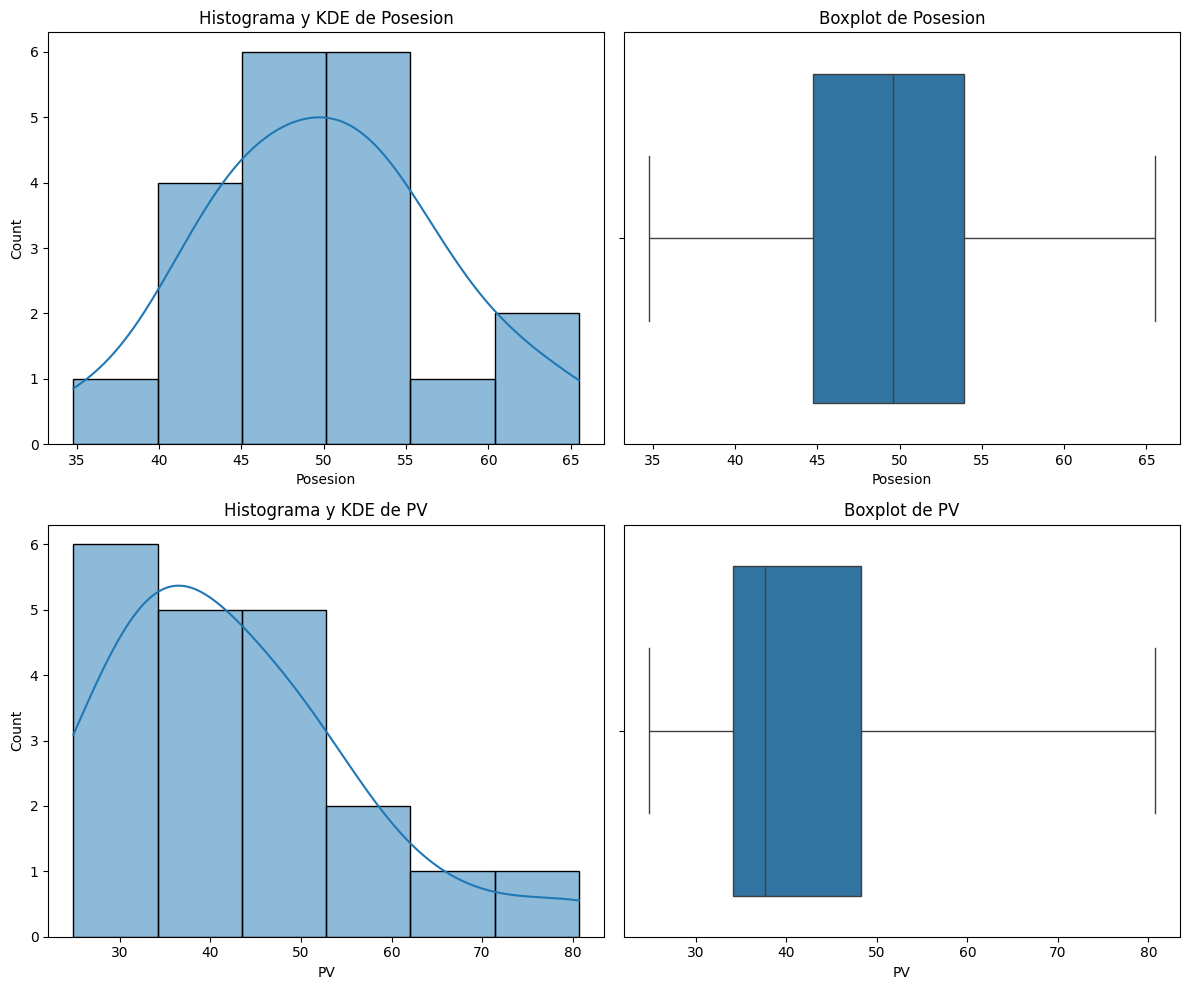

In [188]:
plot_combined_graphs(df_liga2021, ['Posesion', 'PV'], whisker_width = 4.5);

(2, 2)


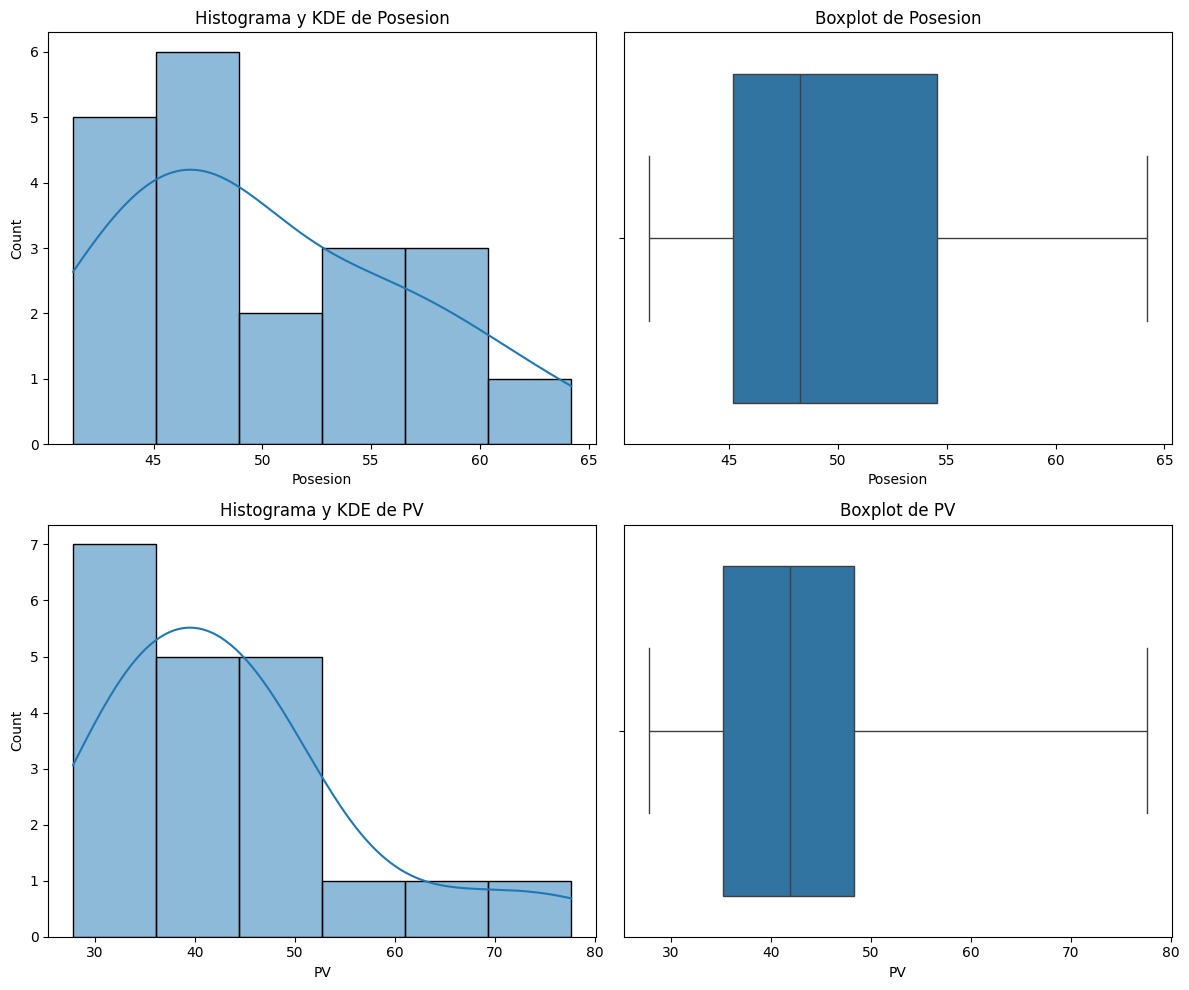

In [189]:
plot_combined_graphs(df_liga2122, ['Posesion', 'PV'], whisker_width = 4.5);

(2, 2)


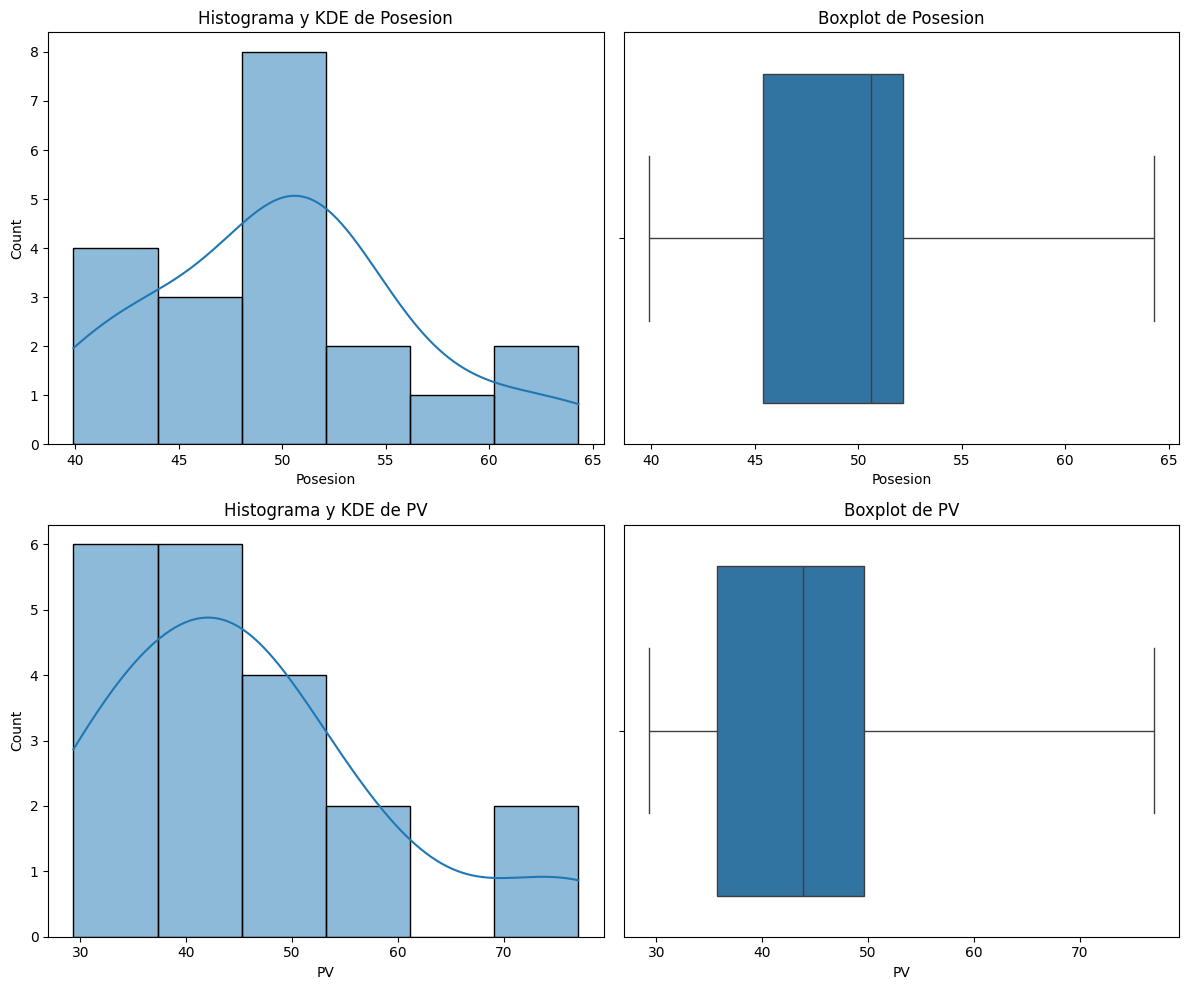

In [190]:
plot_combined_graphs(df_liga2223, ['Posesion', 'PV'], whisker_width = 4.5);

In [225]:
df_liga2021[['Equipo', 'Posesion', 'PV']].sort_values(by='Posesion', ascending=False)

,Equipo,Posesion,PV
3,Barcelona,65.5,80.69
16,Sevilla,60.9,50.77
14,Real Madrid,59.3,65.36
19,Villarreal,55.2,53.94
15,Real Sociedad,54.9,47.18
4,Betis,53.6,47.36
6,Cádiz,53.3,37.35
2,Atlético Madrid,52.3,54.51
12,Levante,52.2,44.76
1,Athletic Club,49.9,44.14


In [191]:
descripcion

,Nombre del campo,Descripcion,Tipo de variable,Importancia inicial,Notas
0,Pos,Posicion en la tabla al final de la liga,int64,1,Podrá corroborar si estamos en lo cierto
1,Equipo,Nombre del equipo,object,1,Nombres
2,PJ,Partidos jugados,int64,3,Única columna que deben tener todos en común
3,PG,Partidos ganados,int64,2,Nos da una visión de los resultados
4,PE,Partidos empatados,int64,2,Nos da una visión de los resultados
5,PP,Partidos perdidos,int64,2,Nos da una visión de los resultados
6,GF,Goles a favor,int64,1,Utilidad para relacionar con la posesion
7,GC,Goles en contra,int64,1,Utilidad para relacionar con la posesion
8,Pts,Puntuacion al final de liga,int64,1,Muestra el desempeño final
9,xG,Valor de los tios a porteria,float64,2,Influye en la calidad del tiro


(2, 2)


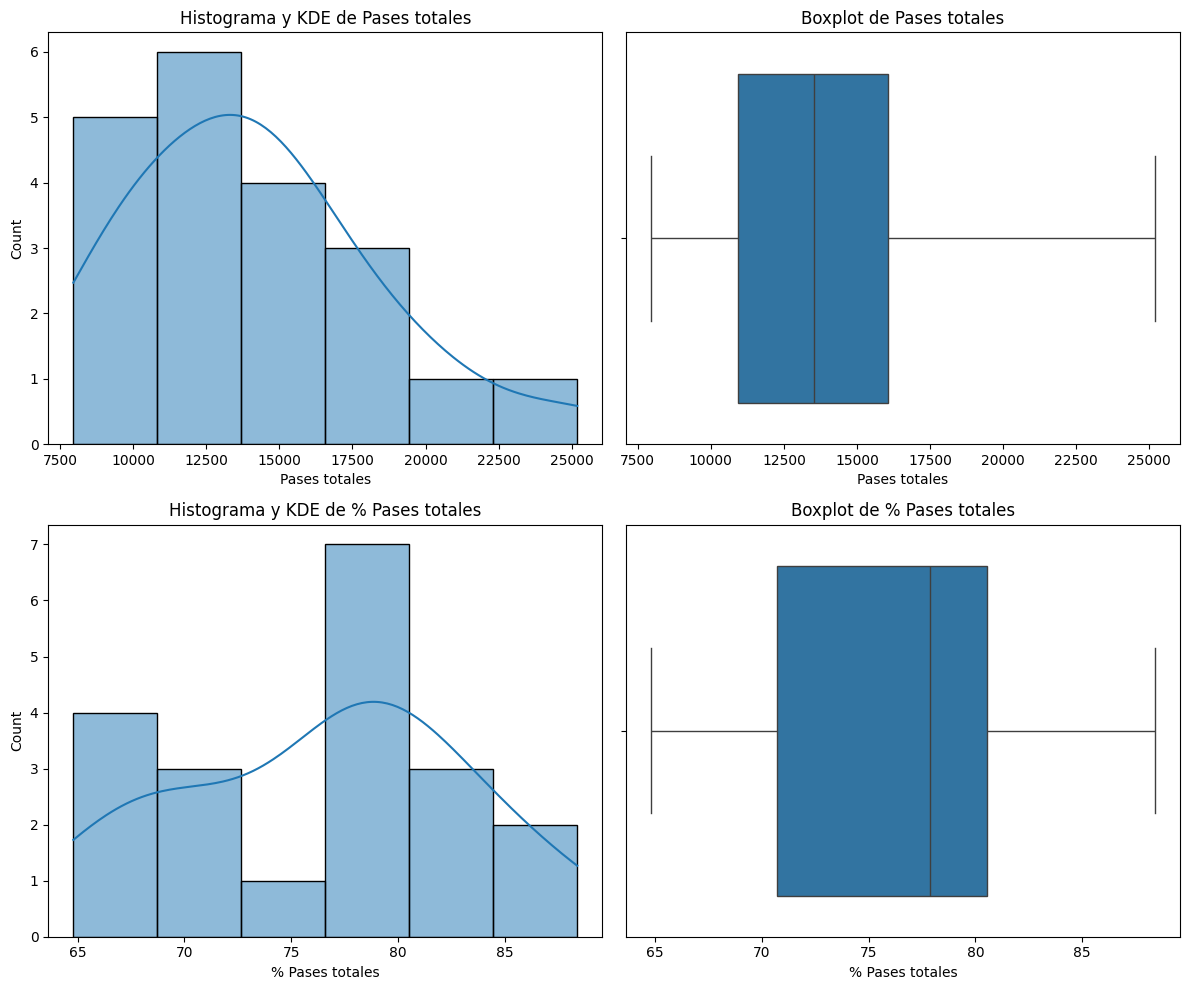

In [192]:
plot_combined_graphs(df_liga2021, ['Pases totales', '% Pases totales'], whisker_width = 4.5);

In [193]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

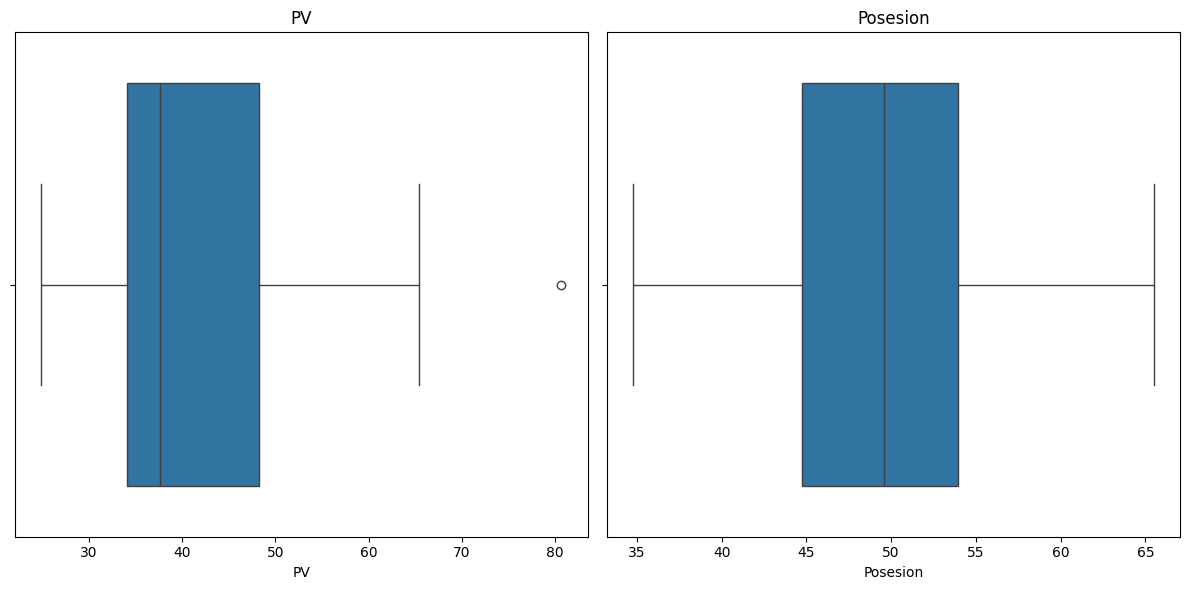

In [194]:
plot_multiple_boxplots(df_liga2021, columns=['PV', 'Posesion'])

In [195]:
df_liga2021

,Pos,Equipo,PJ,PG,PE,PP,GF,GC,Pts,xG,...,Posesion,TA,TR,Tiros en contra,Paradas,Tiros a puerta,TalArc/90,Pases totales,% Pases totales,PV
0,16,Alavés,38,9,11,18,36,57,38,42.6,...,42.8,96,8,142,85,95,2.50,10216,71.0,30.29
1,10,Athletic Club,38,11,13,14,46,42,46,43.1,...,49.9,82,3,111,69,128,3.37,13578,76.1,44.14
2,1,Atlético Madrid,38,26,8,4,67,25,86,52.8,...,52.3,100,0,122,98,178,4.68,16757,81.0,54.51
3,3,Barcelona,38,24,7,7,85,38,79,73.5,...,65.5,72,2,130,94,231,6.08,25192,88.4,80.69
4,6,Betis,38,17,10,11,50,50,61,49.1,...,53.6,93,8,136,87,145,3.82,15814,80.4,47.36
5,8,Celta Vigo,38,14,11,13,55,57,53,50.4,...,34.8,81,3,150,91,97,2.55,7949,65.9,24.86
6,12,Cádiz,38,11,11,16,36,58,44,34.7,...,53.3,109,5,138,81,133,3.50,15176,78.6,37.35
7,20,Eibar,38,6,12,20,29,52,30,45.2,...,49.3,71,3,135,82,127,3.34,11810,69.9,37.86
8,17,Elche,38,8,12,18,34,55,36,29.9,...,47.5,99,3,163,106,86,2.26,13481,79.0,25.07
9,15,Getafe,38,9,11,18,28,43,38,34.4,...,43.3,120,7,111,70,97,2.55,8977,64.8,35.03


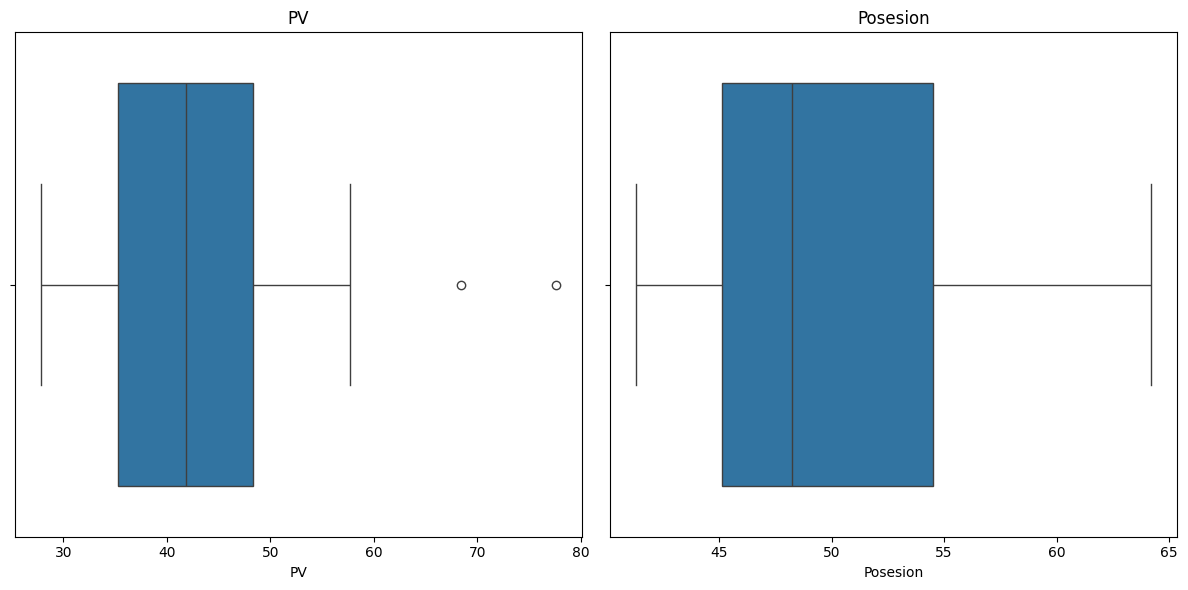

In [196]:
plot_multiple_boxplots(df_liga2122, columns=['PV', 'Posesion'])

In [197]:
df_liga2122

,Pos,Equipo,PJ,PG,PE,PP,GF,GC,Pts,xG,...,Posesion,TA,TR,Tiros en contra,Paradas,Tiros a puerta,TalArc/90,Pases totales,% Pases totales,PV
0,20,Alavés,38,8,7,23,31,65,31,37.3,...,42.0,93,4,168,100,111,2.92,9676,68.3,31.19
1,8,Athletic Club,38,14,13,11,43,36,55,49.6,...,48.1,90,4,131,96,150,3.95,12947,74.9,45.42
2,3,Atlético Madrid,38,21,8,9,65,43,71,54.4,...,50.6,111,7,106,65,152,4.00,15076,78.9,48.29
3,2,Barcelona,38,21,10,7,68,38,73,63.4,...,64.2,97,5,123,84,177,4.66,21489,85.9,68.40
4,5,Betis,38,19,8,11,62,40,65,53.5,...,53.7,87,6,132,94,182,4.79,15702,80.8,48.36
5,11,Celta Vigo,38,12,10,16,43,43,46,43.1,...,41.3,105,3,170,117,118,3.11,10136,70.3,34.58
6,17,Cádiz,38,8,15,15,35,51,39,39.5,...,55.2,87,3,136,91,135,3.55,16007,77.7,43.11
7,13,Elche,38,11,9,18,40,52,42,33.7,...,48.4,104,6,174,121,106,2.79,12948,76.9,31.41
8,14,Espanyol,38,10,12,16,40,53,42,36.7,...,46.9,99,7,169,118,128,3.37,13360,79.0,35.71
9,15,Getafe,38,8,15,15,33,41,39,29.3,...,41.5,121,8,132,91,111,2.92,10278,70.4,27.82


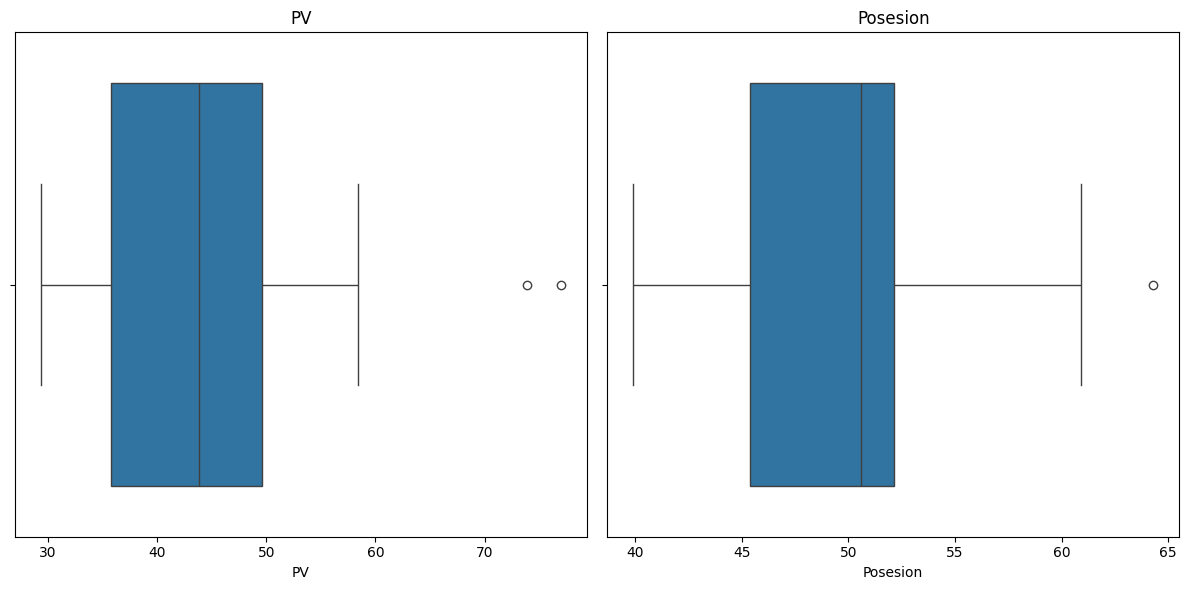

In [198]:
plot_multiple_boxplots(df_liga2223, columns=['PV', 'Posesion'])

In [199]:
df_liga2223

,Pos,Equipo,PJ,PG,PE,PP,GF,GC,Pts,xG,...,Posesion,TA,TR,Tiros en contra,Paradas,Tiros a puerta,TalArc/90,Pases totales,% Pases totales,PV
0,17,Almería,38,11,8,19,49,65,41,45.5,...,45.1,98,4,203,138,155,4.08,12151,76.6,35.82
1,8,Athletic Club,38,14,9,15,47,43,51,54.2,...,51.6,81,5,123,83,157,4.13,14440,77.5,56.77
2,3,Atlético Madrid,38,23,8,7,70,33,77,61.9,...,50.6,92,8,128,95,195,5.13,16814,82.1,52.91
3,1,Barcelona,38,28,4,6,70,20,88,75.5,...,64.3,83,6,102,85,187,4.92,21293,86.1,77.02
4,6,Betis,38,17,9,12,46,41,60,51.3,...,50.6,82,15,146,106,138,3.63,14678,80.4,43.16
5,13,Celta Vigo,38,11,10,17,43,53,43,42.6,...,41.9,116,7,202,148,108,2.84,9940,71.2,29.90
6,14,Cádiz,38,10,12,16,30,53,42,41.5,...,50.2,85,6,134,80,160,4.21,14700,79.5,45.40
7,20,Elche,38,5,10,23,30,67,25,37.5,...,45.5,99,12,208,140,124,3.26,12051,76.5,33.93
8,19,Espanyol,38,8,13,17,52,69,37,48.3,...,43.1,99,10,183,115,151,3.97,10827,73.7,35.53
9,15,Getafe,38,10,12,16,34,45,42,36.7,...,39.9,125,9,166,119,116,3.05,9690,68.6,30.44


In [200]:
def plot_histo_dens(df, columns, bins=None):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            if bins:
                sns.histplot(df[column], kde=True, ax=axes[i], bins=bins)
            else:
                sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [201]:
def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()

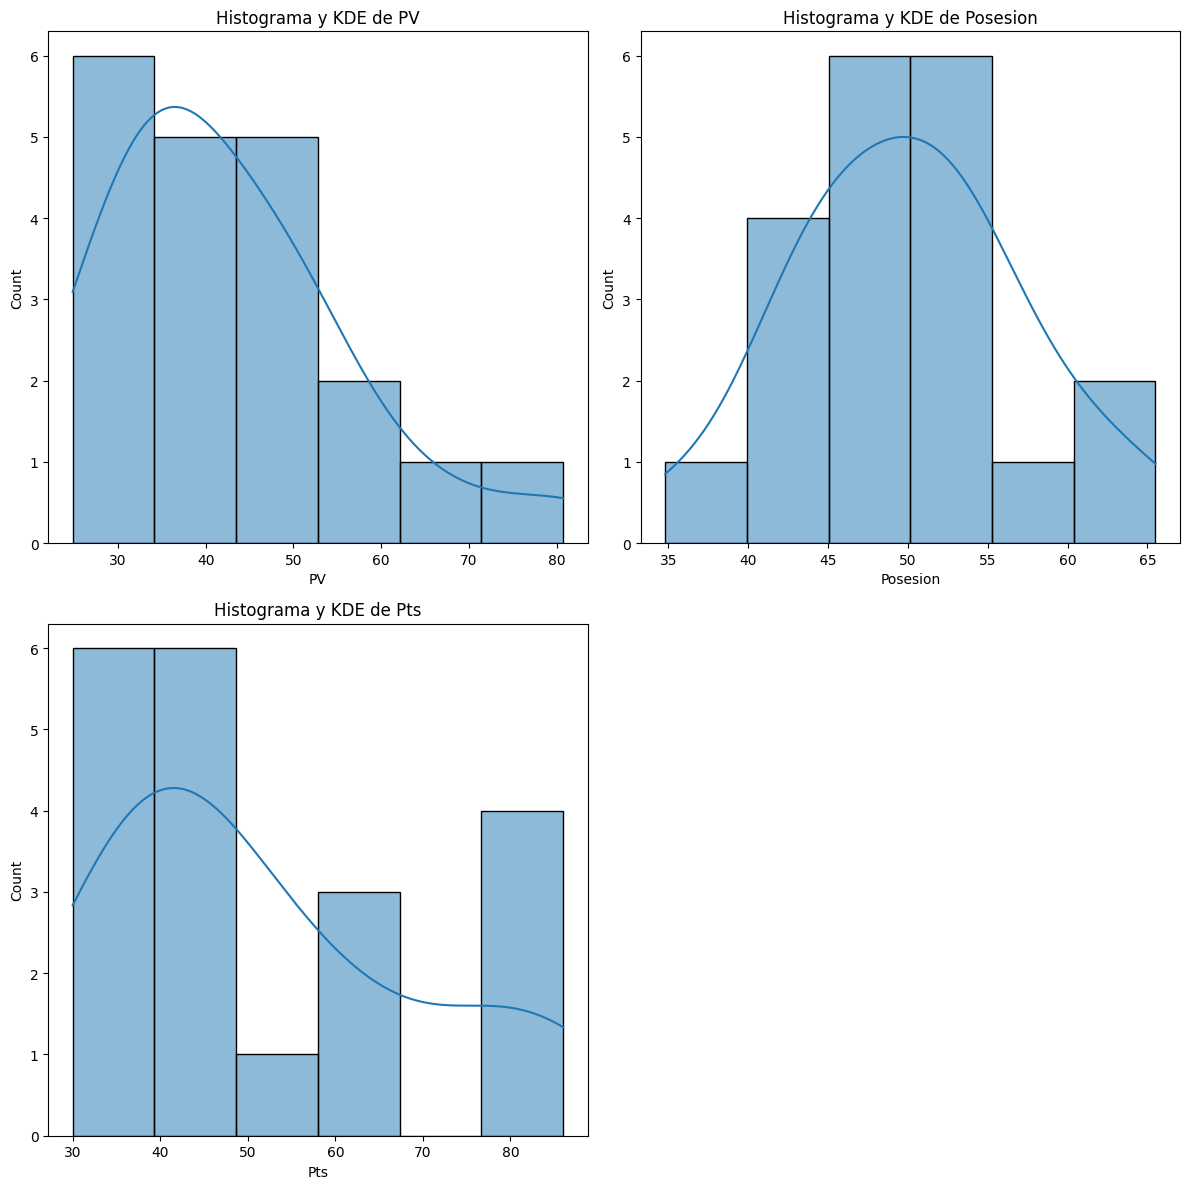

In [202]:
plot_histo_dens(df_liga2021, columns=['PV', 'Posesion', 'Pts'])

In [203]:
df_liga2021

,Pos,Equipo,PJ,PG,PE,PP,GF,GC,Pts,xG,...,Posesion,TA,TR,Tiros en contra,Paradas,Tiros a puerta,TalArc/90,Pases totales,% Pases totales,PV
0,16,Alavés,38,9,11,18,36,57,38,42.6,...,42.8,96,8,142,85,95,2.50,10216,71.0,30.29
1,10,Athletic Club,38,11,13,14,46,42,46,43.1,...,49.9,82,3,111,69,128,3.37,13578,76.1,44.14
2,1,Atlético Madrid,38,26,8,4,67,25,86,52.8,...,52.3,100,0,122,98,178,4.68,16757,81.0,54.51
3,3,Barcelona,38,24,7,7,85,38,79,73.5,...,65.5,72,2,130,94,231,6.08,25192,88.4,80.69
4,6,Betis,38,17,10,11,50,50,61,49.1,...,53.6,93,8,136,87,145,3.82,15814,80.4,47.36
5,8,Celta Vigo,38,14,11,13,55,57,53,50.4,...,34.8,81,3,150,91,97,2.55,7949,65.9,24.86
6,12,Cádiz,38,11,11,16,36,58,44,34.7,...,53.3,109,5,138,81,133,3.50,15176,78.6,37.35
7,20,Eibar,38,6,12,20,29,52,30,45.2,...,49.3,71,3,135,82,127,3.34,11810,69.9,37.86
8,17,Elche,38,8,12,18,34,55,36,29.9,...,47.5,99,3,163,106,86,2.26,13481,79.0,25.07
9,15,Getafe,38,9,11,18,28,43,38,34.4,...,43.3,120,7,111,70,97,2.55,8977,64.8,35.03


(4, 2)


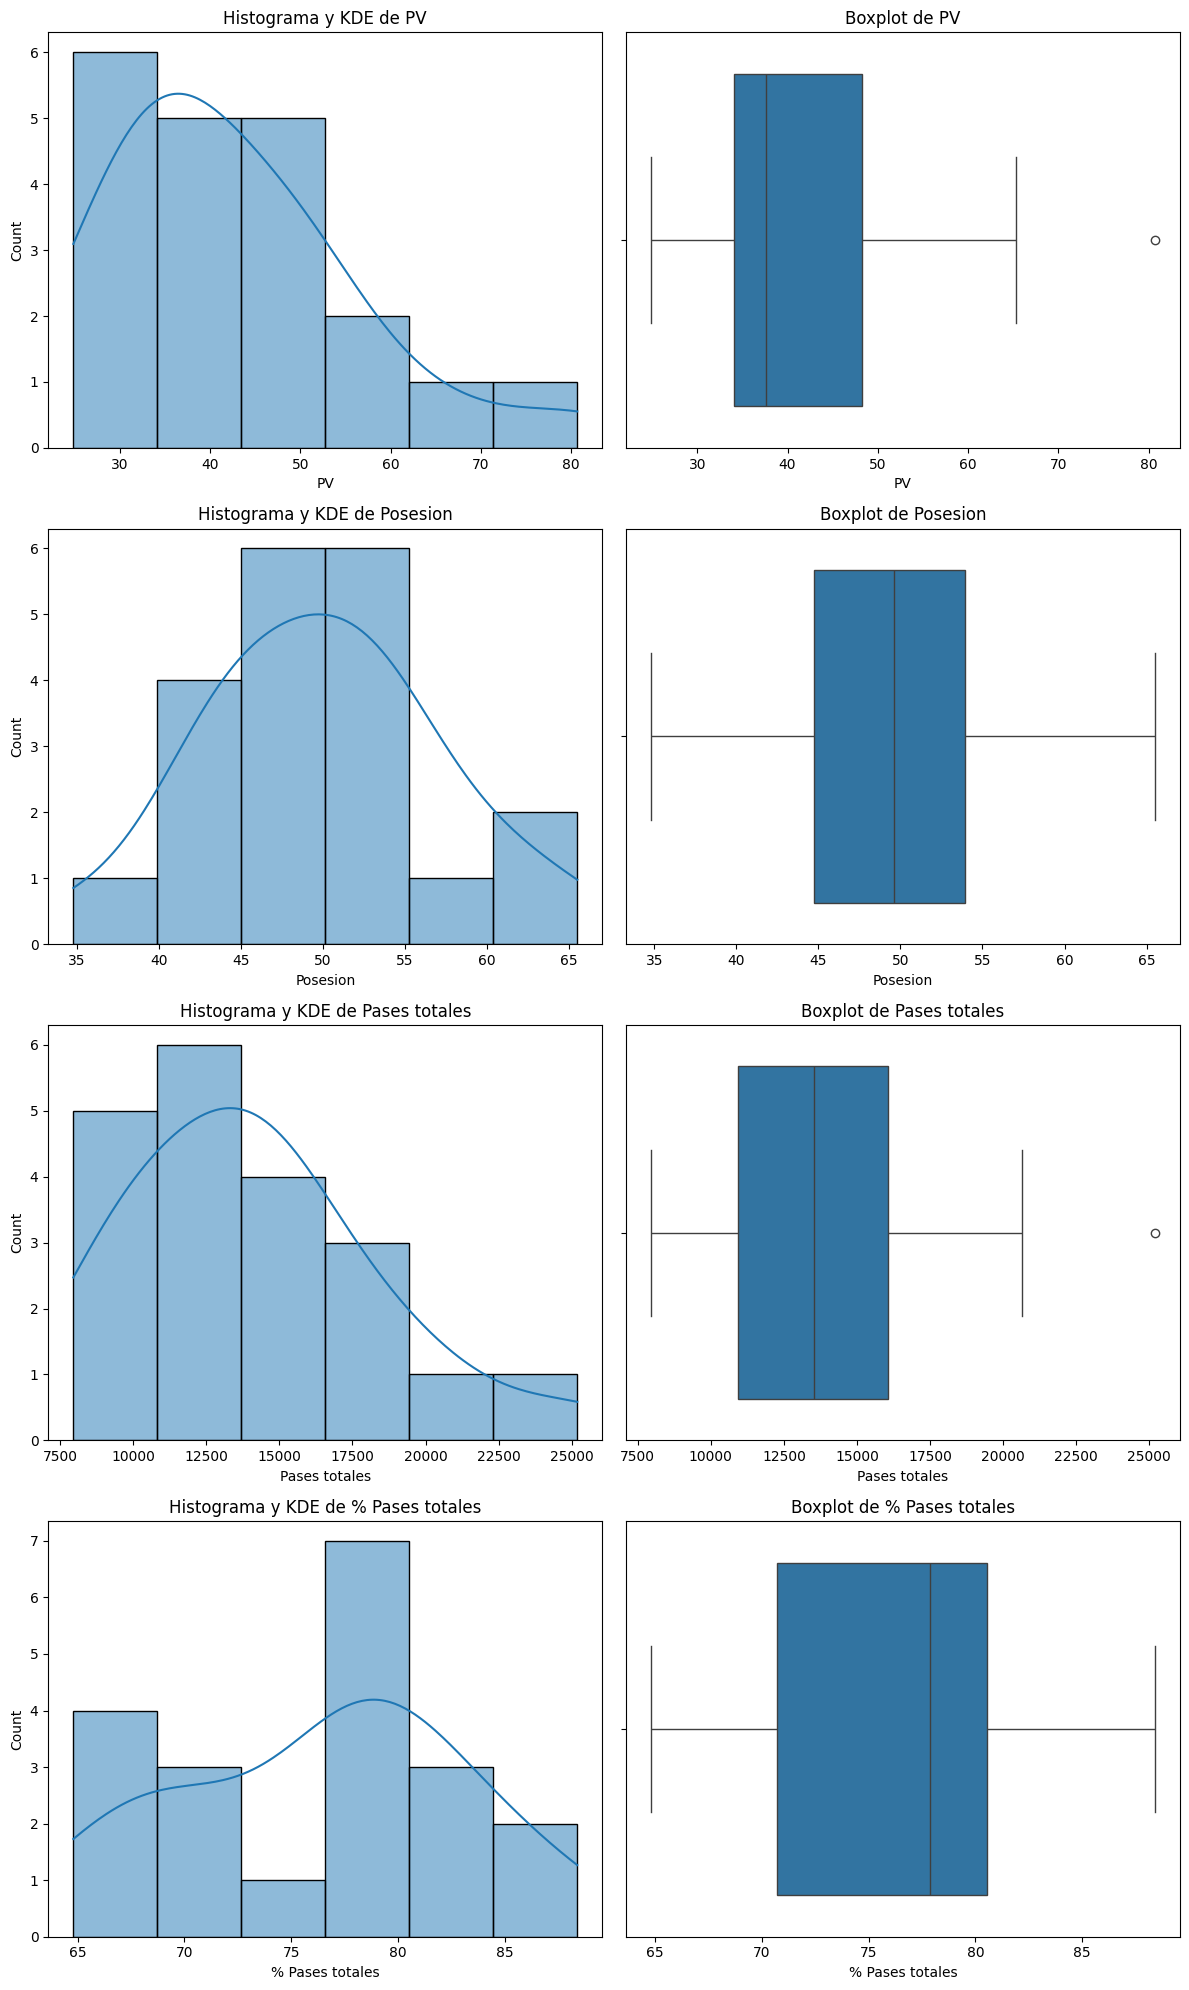

In [204]:
plot_combined_graphs(df_liga2021, columns=['PV', 'Posesion', 'Pases totales', '% Pases totales'])